# Assumptions for data cleaning
    Assuming product name exists for every record in the report
    01)For N/A values in Price, calculate mean value of other company products of same size
    02)For N/A values in Ratings per 5★, calculate mean value of other available products of same company
    03)For N/A values in No.of ratings, consider as 1
    04)For N/A values in Resolution, consider most occuring value of other available products of the same company
    05)For N/A values in Sound Output, consider most occuring value of other available products of the same company
    06)For N/A values in Refresh Rate, consider most occuring value of other available products of the same company
    07)For N/A values in Wall Mount Included, consider most occuring value of other available products of the same company [Flipkart data only]
    08)For N/A values in View Angle, consider most occuring value of other available products of the same company
    [Flipkart data only]
    09)For N/A values in Supported Apps, consider the most commonly supported set of apps by other available products of the same company
    10)For N/A values in Operating System, consider most common OS of other available products of the same company
    11)For N/A values in Ram Capacity, consider most common Ram Capacity of other available products of same company
    [Flipkart data only]
    12)For N/A values in Storage Memory, consider most common Storage Memory of other available products of same company
    [Flipkart data only]

# Actions_before_analysis
    *Find the no.of OTT platforms supported and perform the analysis accordingly
    *Separate the company name from product name as Company name
    *Separate the display size from product name as Display size
    *After cleaning the individual scrape data write them into a single file

# Questions to be analysed:

1) How many different brands, different types of OS, different sizes are available?
2) What is the average _______ of ______ TVs?(on Flipkart dataset)

	---> Price, Company
	---> Price, Display sizes
	---> Price, Ratings
	---> Ratings, OS
	---> Ratings, Company
3) For flipkart dataset, list the companies based on their customer_score, where customer_score=Ratings per 5★ x No.of ratings
4) For an input money and display size, return a list of 5 TVs with:
	(a) max number of OTTs(for reliance-digital dataset) &
	(b) most customer_score

In [1]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
flipkart_df=pd.read_excel(r"C:\Users\srika\OneDrive\Desktop\Python_practise\Webscraping_projects\TV_analysis\FK_TV_scraping_output.xlsx")
flipkart_df.index=pd.RangeIndex(start=1,stop=flipkart_df.shape[0]+1,step=1)
flipkart_df

,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory
1,Mi 5A 100 cm (40 inch) Full HD LED Smart Andro...,"₹21,999",4.4,"3,31,969",Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Full HD 1920 x 1080 Pixels,24 W,60 Hz,L40M7-EAIN,2022,No,178 Degree,1.5 GB,8 GB
2,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,"₹39,999",4.4,"4,656",Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,30 W,60 Hz,L55M7-A2IN,2022,No,178 Degree,2 GB,8 GB
3,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹13,999",4.4,"3,31,969",Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,20 W,60 Hz,L32M7-5AIN,2022,No,178 Degree,1 GB,8 GB
4,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV...,"₹13,499",4.4,"49,863",Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,HD Ready 1366 x 768 Pixels,10 W,50 Hz,32LM565BPTA,2020,NaN,178 Degree,1 GB,4 GB
5,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,"₹13,490",4.3,"75,187",Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,HD Ready 1366 x 768 Pixels,20 W,50 Hz,UA32T4380AKXXL,2022,No,178 degree,1.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,Adsun Smart Series 60 cm (24 inch) HD Ready LE...,"₹6,649",3.9,"14,531",Netflix|Prime Video|Disney+Hotstar|Youtube,Android Based,HD Ready 1366 x 768 Pixels,10 W,60 Hz,A-2440S,2021,Yes,178 Degree,512 MB,4 GB
789,PHILIPS 6800 Series 108 cm (43 inch) Full HD L...,"₹26,950",4.0,112,Netflix|Prime Video|Youtube,Linux based,Full HD 1920 x 1080 Pixels,16 W,60 Hz,43PFT6815/94,2021,Yes,NaN,NaN,NaN
790,SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Sma...,"₹35,999",3.8,(476),Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,UA43AU7600KXXL,2022,Yes,NaN,NaN,NaN
791,Panasonic FX650 Series 108 cm (43 inch) Ultra ...,"₹41,999",4.4,201,Netflix|Prime Video|Youtube,Linux based,Ultra HD (4K) 3840 x 2160 Pixels,20 W,100 Hz,TH-43FX650D,2018,NaN,NaN,NaN,NaN


In [3]:
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 1 to 792
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         792 non-null    object 
 1   Price                792 non-null    object 
 2   Ratings per 5★       788 non-null    float64
 3   No.of ratings        719 non-null    object 
 4   Supported Apps       726 non-null    object 
 5   Operating System     737 non-null    object 
 6   Resolution           792 non-null    object 
 7   Sound Output         792 non-null    object 
 8   Refresh Rate         783 non-null    object 
 9   Model Name           792 non-null    object 
 10  Launch year          792 non-null    int64  
 11  Wall Mount Included  660 non-null    object 
 12  View Angle           461 non-null    object 
 13  Ram Capacity         473 non-null    object 
 14  Storage Memory       469 non-null    object 
dtypes: float64(1), int64(1), object(13)
memo

In [4]:
reliance_df=pd.read_excel(r"C:\Users\srika\OneDrive\Desktop\Python_practise\Webscraping_projects\TV_analysis\RD_TV_scraping_output.xlsx")
reliance_df.index=pd.RangeIndex(start=1,stop=reliance_df.shape[0]+1,step=1)
reliance_df

,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output
1,"MI 32 HD Ready Smart LED TV, 4A Horizon, ELA45...","₹16,499.00",Xiaomi,60 Hz,Android TV,1366 x 768,"Netflix, Amazon Prime Video, Disney+ Hotstar...",NaN,NaN
2,"ONEPLUS 81.28 cm (32 inch) HD Smart LED TV, 32Y1","₹14,999.00",One Plus,60 Hz,Android TV,1366 x 768,"You Tube, Netflix, Prime Video, Hotstar",4.3,20 Watt
3,"ONEPLUS 108 cm (43 inch) Full HD Smart LED TV,...","₹24,999.00",One Plus,60 Hz,Android TV,1920 x 1080 - FHD,"YouTube, Netflix, Prime Video, Hotstar",5.0,20 Watt
4,Samsung Wondertainment 80 cm (32 Inch) Smart H...,"₹13,490.00",Samsung,60 Hz,Tizen,1366 x 768 -HD,"Prime Video, Hotstar, Netflix, Zee5 and man...",5.0,NaN
5,"TCL 81.28 cm (32 inch) HD Ready LED Smart TV, ...","₹10,990.00",TCL,60 Hz,Android TV,1366 x 768 -HD,"Netflix, You Tube, Hotstar, Zee5, Voot",5.0,2 x 8 Watt
...,...,...,...,...,...,...,...,...,...
303,IFFALCON 139.7 cm (55 Inch) Ultra HD (4K) Smar...,"₹28,990.00",IFFALCON,60 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, YouTube, Hotstar, Zee5, Voot, Go...",5.0,NaN
304,IFFALCON 127 cm (50 Inch) Ultra HD (4K) Smart ...,"₹26,990.00",IFFALCON,60 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, YouTube, Hotstar, Zee5, Voot, Go...",NaN,NaN
305,Sony Bravia 215 cm (85 Inches) 4K Ultra HD Sma...,"₹3,79,990.00",Sony,120 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, Prime Video, Disney Hotstar, Sony L...",NaN,NaN
306,TCL 127 cm (50 inch) 3Yrs Warranty Ultra HD (4...,"₹34,990.00",TCL,NaN,Android TV,3840 x 2160,"Netflix, Prime Video, Disney+Hotstar",NaN,NaN


In [5]:
reliance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 1 to 307
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    307 non-null    object 
 1   Price           307 non-null    object 
 2   Company         307 non-null    object 
 3   Refresh Rate    224 non-null    object 
 4   OS              265 non-null    object 
 5   Resolution      305 non-null    object 
 6   Supported OTT   229 non-null    object 
 7   Ratings per 5★  28 non-null     float64
 8   Sound Output    207 non-null    object 
dtypes: float64(1), object(8)
memory usage: 21.7+ KB


### No.of OTT platforms supported

In [6]:
flipkart_df['Supported Apps']=flipkart_df['Supported Apps'].astype('str')
F_OTT_count=[]
for i in range(1,flipkart_df.shape[0]+1):
        F_OTT_count.append(flipkart_df.loc[i,'Supported Apps'].count('|')+1)
flipkart_df['No.of OTT platforms']=F_OTT_count

In [7]:
reliance_df['Supported OTT']=reliance_df['Supported OTT'].astype('str')
R_OTT_count=[]
for i in range(1,reliance_df.shape[0]+1):
        R_OTT_count.append(reliance_df.loc[i,'Supported OTT'].count('|')+1)
reliance_df['No.of OTT platforms']=R_OTT_count

### Extracting display size

In [8]:
Size=[]
for i in range(1,flipkart_df.shape[0]+1):
    src=flipkart_df.loc[i,'Product Name']
    pattern=re.compile(r'[0-9.]*.(i|I)nch')
    try:
        Size.append(re.search(pattern,src).group())
    except:
        Size.append('')
#print(Size)
flipkart_df['Display size']=Size

In [9]:
size=[]
for i in range(1,reliance_df.shape[0]+1):
    src=reliance_df.loc[i,'Product Name']
    pattern=re.compile(r'[0-9.]*.(i|I)nch')
    try:
        size.append(re.search(pattern,src).group())
    except:
        size.append('')
#print(size)
reliance_df['Display size']=size

## Extracting company name

In [10]:
#Performing this activity only on Flipkart data
Company_name=[]
for i in range(1,flipkart_df.shape[0]+1):
    src=flipkart_df.loc[i,'Product Name']
    pattern=re.compile(r'^\S*\s')
    try:
        Company_name.append(re.search(pattern,src).group().strip())
    except:
        Company_name.append('')
#print(Company_name)
flipkart_df['Company Name']=Company_name

In [11]:
flipkart_df.head()

,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name
1,Mi 5A 100 cm (40 inch) Full HD LED Smart Andro...,"₹21,999",4.4,"3,31,969",Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Full HD 1920 x 1080 Pixels,24 W,60 Hz,L40M7-EAIN,2022,No,178 Degree,1.5 GB,8 GB,4,40 inch,Mi
2,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,"₹39,999",4.4,"4,656",Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,30 W,60 Hz,L55M7-A2IN,2022,No,178 Degree,2 GB,8 GB,4,55 inch,Mi
3,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹13,999",4.4,"3,31,969",Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,20 W,60 Hz,L32M7-5AIN,2022,No,178 Degree,1 GB,8 GB,4,32 inch,Mi
4,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV...,"₹13,499",4.4,"49,863",Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,HD Ready 1366 x 768 Pixels,10 W,50 Hz,32LM565BPTA,2020,NaN,178 Degree,1 GB,4 GB,4,32 inch,LG
5,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,"₹13,490",4.3,"75,187",Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,HD Ready 1366 x 768 Pixels,20 W,50 Hz,UA32T4380AKXXL,2022,No,178 degree,1.5,NaN,4,32 Inch,SAMSUNG


In [12]:
reliance_df.head()

,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output,No.of OTT platforms,Display size
1,"MI 32 HD Ready Smart LED TV, 4A Horizon, ELA45...","₹16,499.00",Xiaomi,60 Hz,Android TV,1366 x 768,"Netflix, Amazon Prime Video, Disney+ Hotstar...",NaN,NaN,1,
2,"ONEPLUS 81.28 cm (32 inch) HD Smart LED TV, 32Y1","₹14,999.00",One Plus,60 Hz,Android TV,1366 x 768,"You Tube, Netflix, Prime Video, Hotstar",4.3,20 Watt,1,32 inch
3,"ONEPLUS 108 cm (43 inch) Full HD Smart LED TV,...","₹24,999.00",One Plus,60 Hz,Android TV,1920 x 1080 - FHD,"YouTube, Netflix, Prime Video, Hotstar",5.0,20 Watt,1,43 inch
4,Samsung Wondertainment 80 cm (32 Inch) Smart H...,"₹13,490.00",Samsung,60 Hz,Tizen,1366 x 768 -HD,"Prime Video, Hotstar, Netflix, Zee5 and man...",5.0,NaN,1,32 Inch
5,"TCL 81.28 cm (32 inch) HD Ready LED Smart TV, ...","₹10,990.00",TCL,60 Hz,Android TV,1366 x 768 -HD,"Netflix, You Tube, Hotstar, Zee5, Voot",5.0,2 x 8 Watt,1,32 inch


## Data cleansing

In [13]:
# Replacing 'I' with 'i' in 'inch'
reliance_df['Display size']=reliance_df['Display size'].str.replace('I','i')

In [14]:
# Replacing 'I' with 'i' in 'inch'
flipkart_df['Display size']=flipkart_df['Display size'].str.replace('I','i')

#### Cleaning "Ratings per 5★" column

In [15]:
#Checking for null values in Ratings column
print(flipkart_df['Ratings per 5★'].isnull().sum())
flipkart_df[flipkart_df['Ratings per 5★'].isnull()]

4


,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name
611,SAMSUNG 7 163 cm (65 inch) Ultra HD (4K) LED S...,"₹92,999",NaN,NaN,Netflix|Disney+Hotstar|Youtube,Tizen,Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,UA65AU7700,2021,No,NaN,NaN,NaN,3,65 inch,SAMSUNG
742,Panasonic 80 cm (32 inch) HD Ready LED Smart T...,"₹19,030",NaN,NaN,nan,NaN,HD Ready 1366×768 Pixels,20 W,60 Hz,TH-32LS550DX,2022,NaN,NaN,NaN,NaN,1,32 inch,Panasonic
767,SAMSUNG 138 cm (55 inch) Ultra HD (4K) LED Sma...,"₹69,899",NaN,NaN,Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,Ultra HD (4K) 3840 x 2160 Pixels,20 W,50 Hz,UA55BU8000KLXL,2022,Yes,NaN,NaN,NaN,4,55 inch,SAMSUNG
775,Oxygen A2 108 cm (43 inch) Ultra HD (4K) LED S...,"₹32,990",NaN,NaN,Netflix|Prime Video|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,43 A2,2021,Yes,178 Degree,1 GB,8 GB,3,43 inch,Oxygen


In [16]:
# Finding company wise average ratings
F_company_wise_average_ratings=round(flipkart_df.groupby(['Company Name'])['Ratings per 5★'].agg('mean'),1)
F_company_wise_average_ratings

Company Name
Adsun        3.9
Akai         4.4
BPL          3.8
BeethoSOL    4.0
Blaupunkt    4.6
            ... 
iFFALCON     4.4
iMEE         2.9
ndgo         3.2
realme       4.3
starshine    2.9
Name: Ratings per 5★, Length: 66, dtype: float64

In [17]:
#Filling null values in 'Ratings per 5★' column with the above series of company wise average ratings
flipkart_df.loc[flipkart_df['Ratings per 5★'].isnull(),'Ratings per 5★']=flipkart_df['Company Name'].map(F_company_wise_average_ratings)

In [18]:
#Checking for null values in 'Ratings per 5★' column
print(flipkart_df['Ratings per 5★'].isnull().sum())

0


In [19]:
#Checking null values in 'Ratings per 5★' column
print(reliance_df['Ratings per 5★'].isnull().sum())
reliance_df[reliance_df['Ratings per 5★'].isnull()]

279


,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output,No.of OTT platforms,Display size
1,"MI 32 HD Ready Smart LED TV, 4A Horizon, ELA45...","₹16,499.00",Xiaomi,60 Hz,Android TV,1366 x 768,"Netflix, Amazon Prime Video, Disney+ Hotstar...",NaN,NaN,1,
6,Hisense 80 cm (32 inch) 2Yr Warranty HD Smart ...,"₹13,490.00",HISENSE,60 Hz,Android TV,1366 x 768 -HD,"Netflix, YouTube, Prime Video, YouTube Kids...",NaN,20 Watt,1,32 inch
7,"OnePlus 100 cm (40 inch) Full HD LED Smart TV,...","₹21,999.00",One Plus,60 Hz,Android TV,1920 x 1080 - FHD,"Prime Video, Netflix, YouTube, Google Play ...",NaN,20 Watt,1,40 inch
11,"Reconnect 80 cm (32 Inch) HD TV, 32H3220, Black","₹7,990.00",Reconnect,NaN,NaN,1366 x 768 -HD,nan,NaN,16 Watt,1,32 inch
12,"Xiaomi 101.6 cm (40 Inch) Full HD Smart TV, 5A...","₹21,999.00",Mi,60 Hz,Android TV,1920 x 1080 - FHD,nan,NaN,24 Watt,1,40 inch
...,...,...,...,...,...,...,...,...,...,...,...
302,Karbonn 80 cm (32 Inch) HD Ready Smart Android...,"₹9,990.00",Karbonn,60 Hz,Android TV,1366 x 768 -HD,"Prime Video, Netflix, Disney + Hotstar, You...",NaN,20 Watt,1,32 inch
304,IFFALCON 127 cm (50 Inch) Ultra HD (4K) Smart ...,"₹26,990.00",IFFALCON,60 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, YouTube, Hotstar, Zee5, Voot, Go...",NaN,NaN,1,50 inch
305,Sony Bravia 215 cm (85 Inches) 4K Ultra HD Sma...,"₹3,79,990.00",Sony,120 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, Prime Video, Disney Hotstar, Sony L...",NaN,NaN,1,85 inch
306,TCL 127 cm (50 inch) 3Yrs Warranty Ultra HD (4...,"₹34,990.00",TCL,NaN,Android TV,3840 x 2160,"Netflix, Prime Video, Disney+Hotstar",NaN,NaN,1,50 inch


In [20]:
#Finding company wise average ratings
R_company_wise_average_ratings=round(reliance_df.groupby(['Company'])['Ratings per 5★'].agg('mean'),1)
print(R_company_wise_average_ratings) # As NA values exist even when grouped by companies(meaning either the company has no TV rated by customers or has only 1 NEW TV for sale ) hence assuuming this to be 5

Company
AIWA         NaN
Akai         3.0
BPL          4.0
Foxsky       4.7
HISENSE      4.8
Hyundai      NaN
IFFALCON     4.4
Itel         NaN
Karbonn      4.2
Kodak        4.7
LG           NaN
Mi           5.0
One Plus     4.6
Onida        NaN
Philips      NaN
Realme       4.5
Reconnect    NaN
Samsung      5.0
Sansui       4.9
Sony         NaN
Soyer        NaN
TCL          5.0
Toshiba      4.0
Xiaomi       NaN
Name: Ratings per 5★, dtype: float64


In [21]:
R_company_wise_average_ratings=R_company_wise_average_ratings.fillna(5)
R_company_wise_average_ratings

Company
AIWA         5.0
Akai         3.0
BPL          4.0
Foxsky       4.7
HISENSE      4.8
Hyundai      5.0
IFFALCON     4.4
Itel         5.0
Karbonn      4.2
Kodak        4.7
LG           5.0
Mi           5.0
One Plus     4.6
Onida        5.0
Philips      5.0
Realme       4.5
Reconnect    5.0
Samsung      5.0
Sansui       4.9
Sony         5.0
Soyer        5.0
TCL          5.0
Toshiba      4.0
Xiaomi       5.0
Name: Ratings per 5★, dtype: float64

In [22]:
#Filling null values in 'Ratings per 5★' column with the above series of company wise average ratings
reliance_df.loc[reliance_df['Ratings per 5★'].isnull(),'Ratings per 5★']=reliance_df['Company'].map(R_company_wise_average_ratings)


In [23]:
#Checking for null values in 'Ratings per 5★' column
reliance_df['Ratings per 5★'].isnull().sum()
#reliance_df.loc[1]

0

#### Cleansing 'No.of ratings' column

In [95]:
#Checking no.of null values
flipkart_df['No.of ratings'].isnull().sum()

0

In [92]:
flipkart_df[flipkart_df['No.of ratings'].isnull()]

,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name
198,PHILIPS 8100 139 cm (55 inch) Ultra HD (4K) LE...,45490,3.8,NaN,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,55PUT8115/94,2021,Yes,178 Degree,8 GB,4 GB,4,55 inch,PHILIPS
201,SAMSUNG 80 cm (32 inch) HD Ready LED Smart Tiz...,18490,4.6,NaN,nan,Tizen,HD Ready 1366 x 768 Pixels,20,60 Hz,UA32T4450,2020,No,178 degree,2.5 GB,8 GB,1,32 inch,SAMSUNG
210,SKYTRON 60 cm (24 inch) HD Ready LED Smart And...,6299,3.9,NaN,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 X 768 Pixels,20 W,60 Hz,24N2B,2022,Yes,178 degree,[],[],4,24 inch,SKYTRON
211,SAMSUNG 80 cm (32 inch) HD Ready LED Smart Tiz...,16490,4.4,NaN,Netflix|Prime Video|Apple TV|Disney+Hotstar|Yo...,Tizen,HD Ready 1024*728 Pixels,10W×2,60 Hz,UA32T4360AKXXL,2022,No,178 degree,2.5 GB,8 GB,5,32 inch,SAMSUNG
215,BPL 109 cm (43 inch) Full HD LED Smart Android...,22699,4.0,NaN,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Full HD 1920 x 1080 Pixels,18 W,60 Hz,43F-A4301,2020,Yes,[],[],[],4,43 inch,BPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,Lloyd 80 cm (32 inch) HD Ready LED Smart TV (...,18590,3.5,NaN,nan,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,20,60 Hz,32HS550C,2021,Yes,178 Degree,2 GB,8 GB,1,32 inch,Lloyd
767,SAMSUNG 138 cm (55 inch) Ultra HD (4K) LED Sma...,69899,4.1,NaN,Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,Ultra HD (4K) 3840 x 2160 Pixels,20 W,50 Hz,UA55BU8000KLXL,2022,Yes,178 degree,2.5 GB,8 GB,4,55 inch,SAMSUNG
775,Oxygen A2 108 cm (43 inch) Ultra HD (4K) LED S...,32990,4.1,NaN,Netflix|Prime Video|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,43 A2,2021,Yes,178 Degree,1 GB,8 GB,3,43 inch,Oxygen
777,iMEE Elite 108 cm (43 inch) HD Ready LED Smart...,21849,2.8,NaN,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,24 W,50 Hz,ELITE-43SFL-Steel Gray,2021,Yes,178 degrees,1 GB,8 GB,4,43 inch,iMEE


In [93]:
# Filling NaN values with 1 irrespective of product / company (??)
flipkart_df.loc[flipkart_df['No.of ratings'].isnull(),'No.of ratings']=flipkart_df['No.of ratings'].fillna(1,inplace=True)

In [94]:
flipkart_df['No.of ratings'].isnull().sum()

0

In [29]:
# Since the column 'No.of ratings' is of type object, casting that into numeric type##!hsnldle it
flipkart_df['No.of ratings']=flipkart_df['No.of ratings'].str.replace('[^0-9]', '', regex=True).astype('float')

In [30]:
flipkart_df['No.of ratings']

1      331969.0
2        4656.0
3      331969.0
4       49863.0
5       75187.0
         ...   
788     14531.0
789       112.0
790       476.0
791       201.0
792      5008.0
Name: No.of ratings, Length: 792, dtype: float64

#### Cleansing 'Price' column

In [31]:
#Checking for null values in Price column
flipkart_df['Price'].isnull().sum()

0

In [32]:
flipkart_df['Price']=flipkart_df['Price'].str.replace('[^0-9]', '', regex=True).astype('int64')

In [33]:
flipkart_df['Price']

1      21999
2      39999
3      13999
4      13499
5      13490
       ...  
788     6649
789    26950
790    35999
791    41999
792     6599
Name: Price, Length: 792, dtype: int64

In [34]:
#Checking for null values in Price column
reliance_df['Price'].isnull().sum()

0

In [35]:
#Stripping the decimal values in the price column
reliance_df['Price']=reliance_df['Price'].str[:-3]

In [36]:
# Casting into ineteger through regex pattern
reliance_df['Price']=reliance_df['Price'].str.replace('[^0-9]', '', regex=True).astype('int64')

In [37]:
reliance_df['Price']

1       16499
2       14999
3       24999
4       13490
5       10990
        ...  
303     28990
304     26990
305    379990
306     34990
307     26990
Name: Price, Length: 307, dtype: int64

#### Cleansing 'Resolution' column

In [38]:
# finding null values in 'Resolution' column
flipkart_df['Resolution'].isnull().sum()

0

In [39]:
# finding null values in 'Resolution' column
print(reliance_df['Resolution'].isnull().sum())
reliance_df[reliance_df['Resolution'].isnull()]

2


,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output,No.of OTT platforms,Display size
112,"Foxsky 60.96 cm (24 Inch) HD Ready LED TV, 24FSN",5499,Foxsky,60 Hz,NaN,NaN,nan,4.7,30 Watts,1,24 inch
187,TCL 107.9 cm (43 inch) 3Yr Warranty Ultra HD (...,23990,TCL,60 Hz,NaN,NaN,"Netflix, YouTube, Hotstar, Zee5, Voot",5.0,30 Watt,1,43 inch


In [40]:
# find most common resolution of a company
#reliance_df[reliance_df['Company']=='Mi']['Resolution'].mode()
R_company_wise_common_Resolution=reliance_df.groupby(['Company'])['Resolution'].agg(pd.Series.mode)
R_company_wise_common_Resolution

Company
AIWA                              3840 x 2160 - Ultra HD
Akai                                      1366 x 768 -HD
BPL                               3840 x 2160 - Ultra HD
Foxsky                                 1920 x 1080 - FHD
HISENSE                           3840 x 2160 - Ultra HD
Hyundai                                   1366 x 768 -HD
IFFALCON                          3840 x 2160 - Ultra HD
Itel         [1920 x 1080 - FHD, 3840 x 2160 - Ultra HD]
Karbonn                                  1280 x 720 - HD
Kodak                             3840 x 2160 - Ultra HD
LG                                3840 x 2160 - Ultra HD
Mi                                     1920 x 1080 - FHD
One Plus                          3840 x 2160 - Ultra HD
Onida        [1920 x 1080 - FHD, 3840 x 2160 - Ultra HD]
Philips                  [1366 x 768, 1920 x 1080 - FHD]
Realme       [1920 x 1080 - FHD, 3840 x 2160 - Ultra HD]
Reconnect                                 1366 x 768 -HD
Samsung                

In [41]:
# Mapping the most common resolution value into corresponding NA values


reliance_df.loc[reliance_df['Resolution'].isnull(),'Resolution']=reliance_df['Company'].map(R_company_wise_common_Resolution)

In [42]:
reliance_df['Resolution'].isnull().sum()

0

#### Cleansing 'Sound Output' column

In [43]:
# finding null values in 'Sound Output' column
flipkart_df['Sound Output'].isnull().sum()

0

In [44]:
# finding null values in 'Sound Output' column
print(reliance_df['Sound Output'].isnull().sum())
reliance_df[reliance_df['Sound Output'].isnull()]

100


,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output,No.of OTT platforms,Display size
1,"MI 32 HD Ready Smart LED TV, 4A Horizon, ELA45...",16499,Xiaomi,60 Hz,Android TV,1366 x 768,"Netflix, Amazon Prime Video, Disney+ Hotstar...",5.0,NaN,1,
4,Samsung Wondertainment 80 cm (32 Inch) Smart H...,13490,Samsung,60 Hz,Tizen,1366 x 768 -HD,"Prime Video, Hotstar, Netflix, Zee5 and man...",5.0,NaN,1,32 inch
14,Realme 80 cm (32 inch) HD Ready LED Smart TV,13999,Realme,NaN,Android TV,1366 x 768 -HD,"Netflix, YouTube, Prime Video, etc.",5.0,NaN,1,32 inch
15,TCL 139.7 cm (55 inch) 3Yrs Warranty QLED Ultr...,40990,TCL,60 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, You Tube, Hotstar, Zee5, Voot",5.0,NaN,1,55 inch
16,"Karbonn 80 cm (32 inch) HD Ready LED TV, Mille...",7999,Karbonn,60 Hz,NaN,1280 x 720 - HD,nan,4.2,NaN,1,32 inch
...,...,...,...,...,...,...,...,...,...,...,...
303,IFFALCON 139.7 cm (55 Inch) Ultra HD (4K) Smar...,28990,IFFALCON,60 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, YouTube, Hotstar, Zee5, Voot, Go...",5.0,NaN,1,55 inch
304,IFFALCON 127 cm (50 Inch) Ultra HD (4K) Smart ...,26990,IFFALCON,60 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, YouTube, Hotstar, Zee5, Voot, Go...",4.4,NaN,1,50 inch
305,Sony Bravia 215 cm (85 Inches) 4K Ultra HD Sma...,379990,Sony,120 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, Prime Video, Disney Hotstar, Sony L...",5.0,NaN,1,85 inch
306,TCL 127 cm (50 inch) 3Yrs Warranty Ultra HD (4...,34990,TCL,NaN,Android TV,3840 x 2160,"Netflix, Prime Video, Disney+Hotstar",5.0,NaN,1,50 inch


In [45]:
# find most common Sound output of a company
R_company_wise_common_Sound=reliance_df.groupby(['Company'])['Sound Output'].agg(pd.Series.mode)
R_company_wise_common_Sound

Company
AIWA                                 2 x 15 Watt
Akai                                     20 Watt
BPL          [18 Watt, 8  + 8 Watt, 9  + 9 Watt]
Foxsky                                  30 Watts
HISENSE                       [20 Watt, 30 Watt]
Hyundai                                  20 Watt
IFFALCON          [2 X 8 Watt, 20 Watt, 30 Watt]
Itel                                     24 Watt
Karbonn                                  20 Watt
Kodak                                    24 Watt
LG                                       20 Watt
Mi                                       24 Watt
One Plus                                 20 Watt
Onida                                         []
Philips                       [12 Watt, 16 Watt]
Realme                                   24 Watt
Reconnect                                16 Watt
Samsung                                  20 Watt
Sansui                                   20 Watt
Sony                                     20 Watt
Soyer       

In [46]:
# Mapping the most common sound output value into corresponding NA values

reliance_df.loc[reliance_df['Sound Output'].isnull(),'Sound Output']=reliance_df['Company'].map(R_company_wise_common_Sound)

In [47]:
reliance_df['Sound Output'].isnull().sum()

0

#### Cleansing 'Refresh Rate' column

In [48]:
# Finding null values
print(flipkart_df['Refresh Rate'].isnull().sum())
flipkart_df[flipkart_df['Refresh Rate'].isnull()]

9


,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name
161,LG 139 cm (55 inch) OLED Ultra HD (4K) Smart W...,99499,4.2,181.0,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,Ultra HD (4K) 3840 x 2160 Pixels,20 W,NaN,OLED55A2PSA,2022,Yes,NaN,2 GB,8 GB,4,55 inch,LG
305,LG 121 cm (48 inch) OLED Ultra HD (4K) Smart W...,74999,4.2,181.0,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,Ultra HD (4K) 3840 x 2160 Pixels,20 W,NaN,OLED48A2PSA,2022,Yes,NaN,2 GB,8 GB,4,48 inch,LG
322,SAMSUNG 138 cm (55 inch) Ultra HD (4K) LED Sma...,241900,3.9,8.0,nan,Tizen,Ultra HD (4K) 3840x2160 Pixels,40 W,NaN,55KS7000,2016,NaN,NaN,NaN,NaN,1,55 inch,SAMSUNG
351,Panasonic 139 cm (55 inch) Ultra HD (4K) LED S...,67129,3.9,476.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,NaN,TH-55LX850DX,2022,Yes,NaN,2 GB,NaN,4,55 inch,Panasonic
359,LG 164 cm (65 inch) OLED Ultra HD (4K) Smart W...,157990,4.2,181.0,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,Ultra HD (4K) 3840 x 2160 Pixels,20 W,NaN,OLED65A2PSA,2022,Yes,NaN,2 GB,8 GB,4,65 inch,LG
378,LG OLED A1 Series 164 cm (65 inch) OLED Ultra ...,164990,4.2,181.0,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,Ultra HD (4K) 3840 x 2160 Pixels,20 W,NaN,OLED65A1PTZ,2021,No,NaN,2 GB,8 GB,4,65 inch,LG
403,LG OLED A1 Series 139 cm (55 inch) OLED Ultra ...,99999,4.2,181.0,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,Ultra HD (4K) 3840 x 2160 Pixels,20 W,NaN,OLED55A1PTZ,2021,No,NaN,2 GB,8 GB,4,55 inch,LG
642,Panasonic 165 cm (65 inch) Ultra HD (4K) LED S...,73800,3.5,NaN,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,NaN,TH-65LX700DX,2022,Yes,NaN,2 GB,NaN,4,65 inch,Panasonic
645,Panasonic 165 cm (65 inch) Ultra HD (4K) LED S...,96649,3.2,NaN,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,NaN,TH-65LX850DX,2022,Yes,NaN,2 GB,NaN,4,65 inch,Panasonic


In [49]:
# find most common refresh rate of a company
F_company_wise_common_refresh_rate=flipkart_df.groupby(['Company Name'])['Refresh Rate'].agg(pd.Series.mode)
F_company_wise_common_refresh_rate

Company Name
Adsun        60 Hz
Akai         60 Hz
BPL          60 Hz
BeethoSOL    60 Hz
Blaupunkt    60 Hz
             ...  
iFFALCON     60 Hz
iMEE         50 Hz
ndgo         60 Hz
realme       60 Hz
starshine    60 Hz
Name: Refresh Rate, Length: 66, dtype: object

In [50]:
# Mapping the most common refresh rate value into corresponding NA values

flipkart_df.loc[flipkart_df['Refresh Rate'].isnull(),'Refresh Rate']=flipkart_df['Company Name'].map(F_company_wise_common_refresh_rate)


In [51]:
flipkart_df['Refresh Rate'].isnull().sum()

0

In [52]:
# Finding NA values

print(reliance_df['Refresh Rate'].isnull().sum())
reliance_df[reliance_df['Refresh Rate'].isnull()]

83


,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output,No.of OTT platforms,Display size
11,"Reconnect 80 cm (32 Inch) HD TV, 32H3220, Black",7990,Reconnect,NaN,NaN,1366 x 768 -HD,nan,5.0,16 Watt,1,32 inch
14,Realme 80 cm (32 inch) HD Ready LED Smart TV,13999,Realme,NaN,Android TV,1366 x 768 -HD,"Netflix, YouTube, Prime Video, etc.",5.0,24 Watt,1,32 inch
17,Mi 109.22 cm (43 inch) Ultra HD (4K) LED Smart...,31999,Xiaomi,NaN,Android TV,3840 x 2160 - Ultra HD,"Netflix, Amazon Prime Video, Disney+ Hotstar",5.0,[],1,43 inch
26,Hisense 139 cm (55 inch) Ultra HD (4K) LED Sma...,43990,HISENSE,NaN,NaN,3840 x 2160 - Ultra HD,"Netflix, Prime video, live tv, Digitalmedia...",4.8,102 Watt,1,55 inch
35,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",19990,Samsung,NaN,Tizen,1366 x 768 -HD,Yes,5.0,40 Watt,1,32 inch
...,...,...,...,...,...,...,...,...,...,...,...
262,Samsung 189 cm (75 inch) Ultra HD (4K) LED Sma...,159990,Samsung,NaN,Tizen,3840 x 2160 - Ultra HD,nan,5.0,20 Watt,1,75 inch
272,Oneplus 126 cm (50 inch) Ultra HD (4K) Smart A...,32999,One Plus,NaN,Android TV,3840 x 2160 - Ultra HD,"OxygenPlay, Prime Video, Hotstar, Netflix, ...",4.6,20 Watt,1,50 inch
274,Samsung 139.7 cm (55 Inch) Ultra HD (4K) Smart...,70900,Samsung,NaN,Tizen,3840 x 2160 - Ultra HD,"Samsung TV Plus, Netflix, Prime Video, Disn...",5.0,20 Watt,1,55 inch
275,Samsung 109.22 cm (43 Inch) Crystal Ultra HD ...,47900,Samsung,NaN,Tizen,3840 x 2160 - Ultra HD,"Samsung TV Plus, Netflix, Prime Video, Disn...",5.0,20 Watt,1,43 inch


In [53]:
# find most common refresh rate of a company
R_company_wise_common_refresh_rate=reliance_df.groupby(['Company'])['Refresh Rate'].agg(pd.Series.mode)
R_company_wise_common_refresh_rate

Company
AIWA                     []
Akai                  60 Hz
BPL                   60 Hz
Foxsky                60 Hz
HISENSE               60 Hz
Hyundai                  []
IFFALCON              60 Hz
Itel                  60 Hz
Karbonn               60 Hz
Kodak                 60 Hz
LG                    60 Hz
Mi                    60 Hz
One Plus              60 Hz
Onida                 60 Hz
Philips               50 Hz
Realme                60 Hz
Reconnect                []
Samsung      [50 Hz, 60 Hz]
Sansui                60 Hz
Sony                  50 Hz
Soyer                 60 Hz
TCL                   60 Hz
Toshiba               60 Hz
Xiaomi                60 Hz
Name: Refresh Rate, dtype: object

In [54]:
# Mapping the most common refresh rate value into corresponding NA values

reliance_df.loc[reliance_df['Refresh Rate'].isnull(),'Refresh Rate']=reliance_df['Company'].map(R_company_wise_common_refresh_rate)


In [55]:
reliance_df['Refresh Rate'].isnull().sum()

0

#### Cleansing 'Wall Mount Included' column

In [56]:
# Finding null values
print(flipkart_df['Wall Mount Included'].isnull().sum())
flipkart_df[flipkart_df['Wall Mount Included'].isnull()]

132


,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name
4,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV...,13499,4.4,49863.0,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,HD Ready 1366 x 768 Pixels,10 W,50 Hz,32LM565BPTA,2020,NaN,178 Degree,1 GB,4 GB,4,32 inch,LG
25,Sansui 80 cm (32 inch) HD Ready LED Smart Andr...,10999,4.1,1222.0,Netflix|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,20,60 Hz,JSW32ASHD,2020,NaN,NaN,1,8,3,32 inch,Sansui
98,SONY Bravia 108 cm (43 inch) Ultra HD (4K) LED...,40999,4.6,292.0,nan,NaN,Ultra HD (4K) 3840 x 2160 pixels Pixels,10w + 10w,60 Hz,KD-43X7500H,2019,NaN,NaN,NaN,NaN,1,43 inch,SONY
187,LG 164 cm (65 inch) OLED Ultra HD (4K) Smart T...,195999,3.8,476.0,nan,NaN,Ultra HD (4K) 3840 x 2160 Pixels,40 W ( 2.2 Ch ),120 Hz,65C2PSC,2022,NaN,NaN,NaN,NaN,1,65 inch,LG
191,LG 81.28 cm (32 inch) Full HD LED Smart TV (3...,17100,4.6,21.0,nan,NaN,Full HD 1366 x768 Pixels,10W X 2.0 Ch,60 Hz,32LQ570BPSA,2021,NaN,NaN,NaN,NaN,1,32 inch,LG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,starshine 80 cm (32 inch) Full HD LED Smart An...,10999,2.9,60.0,Netflix|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Full HD 1920 x 1080 Pixels,20W,60 Hz,ATPL-3400,2021,NaN,NaN,NaN,NaN,3,32 inch,starshine
759,Lloyd 80 cm (32 inch) HD Ready LED Smart TV (...,18590,3.5,NaN,nan,NaN,HD Ready 1366 x 768 Pixels,20,60 Hz,32HS550C,2021,NaN,NaN,NaN,NaN,1,32 inch,Lloyd
766,ndgo 100 cm (40 inch) Full HD LED Smart TV (N...,19999,3.2,60.0,nan,NaN,Full HD 1920x1080 Pixels,20W,45 Hz,N-40`,2021,NaN,NaN,NaN,NaN,1,40 inch,ndgo
787,Haier 127 cm (50 inch) Ultra HD (4K) LED Smart...,35990,3.8,99.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,LE50K6600HQGA,2020,NaN,NaN,NaN,NaN,4,50 inch,Haier


In [57]:
# find most common wall mount availability of a company
F_company_wise_wall_mount_availability=flipkart_df.groupby(['Company Name'])['Wall Mount Included'].agg(pd.Series.mode)
F_company_wise_wall_mount_availability

Company Name
Adsun        Yes
Akai          []
BPL          Yes
BeethoSOL    Yes
Blaupunkt    Yes
            ... 
iFFALCON      No
iMEE         Yes
ndgo          []
realme        No
starshine     []
Name: Wall Mount Included, Length: 66, dtype: object

In [58]:
# Mapping the most common wall mount availability value into corresponding NA values

flipkart_df.loc[flipkart_df['Wall Mount Included'].isnull(),'Wall Mount Included']=flipkart_df['Company Name'].map(F_company_wise_wall_mount_availability)


In [59]:
flipkart_df['Wall Mount Included'].isnull().sum()

0

#### Cleansing 'View Angle' column

In [60]:
# Finding null values
print(flipkart_df['View Angle'].isnull().sum())
flipkart_df[flipkart_df['View Angle'].isnull()]

331


,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name
6,OnePlus Y1S 80 cm (32 inch) HD Ready LED Smart...,15999,4.3,139230.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,20 W,60 Hz,32HD2A00,2022,No,NaN,NaN,8 GB,4,32 inch,OnePlus
9,OnePlus Y1S 108 cm (43 inch) Full HD LED Smart...,24999,4.3,139230.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Full HD 1920 x 1080 Pixels,20 W,60 Hz,43FD2A00,2022,No,NaN,NaN,8 GB,4,43 inch,OnePlus
25,Sansui 80 cm (32 inch) HD Ready LED Smart Andr...,10999,4.1,1222.0,Netflix|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,20,60 Hz,JSW32ASHD,2020,Yes,NaN,1,8,3,32 inch,Sansui
27,SAMSUNG 80 cm (32 inch) HD Ready LED Smart Tiz...,12999,4.3,75187.0,Netflix|Disney+Hotstar|Youtube,Tizen,HD Ready 1366 x 768 Pixels,20 W,60 Hz,UA32T4340AKXXL / UA32T4340BKXXL,2020,No,NaN,NaN,NaN,3,32 inch,SAMSUNG
38,LG UQ7500 139 cm (55 inch) Ultra HD (4K) LED S...,47999,4.4,11255.0,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,55UQ7500PSF,2022,No,NaN,1.5 GB,8 GB,4,55 inch,LG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,Adsun Frameless 80 cm (32 inch) HD Ready LED S...,8121,3.9,14531.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android Based,HD Ready 1366 x 768 Pixels,20 W,60 Hz,A-3210S/F,2021,Yes,NaN,1 GB,8 GB,4,32 inch,Adsun
787,Haier 127 cm (50 inch) Ultra HD (4K) LED Smart...,35990,3.8,99.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,LE50K6600HQGA,2020,No,NaN,NaN,NaN,4,50 inch,Haier
789,PHILIPS 6800 Series 108 cm (43 inch) Full HD L...,26950,4.0,112.0,Netflix|Prime Video|Youtube,Linux based,Full HD 1920 x 1080 Pixels,16 W,60 Hz,43PFT6815/94,2021,Yes,NaN,NaN,NaN,3,43 inch,PHILIPS
790,SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Sma...,35999,3.8,476.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,UA43AU7600KXXL,2022,Yes,NaN,NaN,NaN,4,43 inch,SAMSUNG


In [61]:
# find most common view angle of a company
F_company_wise_common_view_angle=flipkart_df.groupby(['Company Name'])['View Angle'].agg(pd.Series.mode)
F_company_wise_common_view_angle

Company Name
Adsun         178 Degree
Akai                  []
BPL                   []
BeethoSOL             []
Blaupunkt     178 Degree
                ...     
iFFALCON      178 Degree
iMEE         178 degrees
ndgo                  []
realme        178 Degree
starshine             []
Name: View Angle, Length: 66, dtype: object

In [62]:
# Mapping the most common view angle value into corresponding NA values

flipkart_df.loc[flipkart_df['View Angle'].isnull(),'View Angle']=flipkart_df['Company Name'].map(F_company_wise_common_view_angle)


In [63]:
flipkart_df['View Angle'].isnull().sum()

0

#### Cleansing 'Supported Apps' column

In [68]:
# Finding null values
print(flipkart_df['Supported Apps'].isnull().sum())
flipkart_df[flipkart_df['Supported Apps'].isnull()]

0


,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name


In [65]:
# find most common OTT of a company
F_company_wise_common_OTT=flipkart_df.groupby(['Company Name'])['Supported Apps'].agg(pd.Series.mode)
F_company_wise_common_OTT

Company Name
Adsun               Netflix|Prime Video|Disney+Hotstar|Youtube
Akai                                                       nan
BPL          [Netflix|Prime Video|Disney+Hotstar|Youtube, nan]
BeethoSOL           Netflix|Prime Video|Disney+Hotstar|Youtube
Blaupunkt           Netflix|Prime Video|Disney+Hotstar|Youtube
                                   ...                        
iFFALCON            Netflix|Prime Video|Disney+Hotstar|Youtube
iMEE                Netflix|Prime Video|Disney+Hotstar|Youtube
ndgo                                                       nan
realme              Netflix|Prime Video|Disney+Hotstar|Youtube
starshine                       Netflix|Disney+Hotstar|Youtube
Name: Supported Apps, Length: 66, dtype: object

In [66]:
# Mapping the most common OTT value into corresponding NA values

flipkart_df.loc[flipkart_df['Supported Apps'].isnull(),'Supported Apps']=flipkart_df['Company Name'].map(F_company_wise_common_OTT)


In [67]:
flipkart_df['Supported Apps'].isnull().sum()

0

In [69]:
# Finding null values
print(reliance_df['Supported OTT'].isnull().sum())
reliance_df[reliance_df['Supported OTT'].isnull()]

0


,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output,No.of OTT platforms,Display size


In [70]:
# find most common OTT of a company
R_company_wise_common_OTT=reliance_df.groupby(['Company'])['Supported OTT'].agg(pd.Series.mode)
R_company_wise_common_OTT

Company
AIWA         YouTube,  Netflix,  Prime Video,  Eros Now,  S...
Akai         [Netflix,  Disney+ Hotstar,  Amazon Prime Vide...
BPL                           Netflix,  Youtube,  Amazon Prime
Foxsky       Netflix,  Prime Video,  Zee5,  Eros Now,  Goog...
HISENSE      [Netflix,  YouTube,  Prime Video,  YouTube Kid...
Hyundai                                                    nan
IFFALCON     Netflix,  YouTube,  Hotstar,  Zee5,  Voot,  Go...
Itel         [Prime Video,  Hotstar,  Youtube,  Netflix,  Z...
Karbonn                                                    nan
Kodak        Amazon Prime Video,  Sony Liv,  Disney+Hotstar...
LG                     Netflix,  Prime Video,  Disney+ Hotstar
Mi                                                         nan
One Plus     OxygenPlay,  YouTube,  Netflix,  Prime Video, ...
Onida                                                      nan
Philips                        Netflix,  YouTube,  Prime Video
Realme                  Netflix,  YouTube,  Pri

In [71]:
# Mapping the most common OTT value into corresponding NA values

reliance_df.loc[reliance_df['Supported OTT'].isnull(),'Supported OTT']=reliance_df['Company'].map(R_company_wise_common_OTT)


In [72]:
reliance_df['Supported OTT'].isnull().sum()

0

#### Cleansing 'Operating System' column

In [73]:
# Finding null values
print(flipkart_df['Operating System'].isnull().sum())
flipkart_df[flipkart_df['Operating System'].isnull()]

55


,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name
98,SONY Bravia 108 cm (43 inch) Ultra HD (4K) LED...,40999,4.6,292.0,nan,NaN,Ultra HD (4K) 3840 x 2160 pixels Pixels,10w + 10w,60 Hz,KD-43X7500H,2019,Yes,178 Degree,NaN,NaN,1,43 inch,SONY
187,LG 164 cm (65 inch) OLED Ultra HD (4K) Smart T...,195999,3.8,476.0,nan,NaN,Ultra HD (4K) 3840 x 2160 Pixels,40 W ( 2.2 Ch ),120 Hz,65C2PSC,2022,No,Wide Viewing Angle degree,NaN,NaN,1,65 inch,LG
191,LG 81.28 cm (32 inch) Full HD LED Smart TV (3...,17100,4.6,21.0,nan,NaN,Full HD 1366 x768 Pixels,10W X 2.0 Ch,60 Hz,32LQ570BPSA,2021,No,Wide Viewing Angle degree,NaN,NaN,1,32 inch,LG
235,LG 81.28 cm (32 inch) Full HD LED Smart TV (3...,24489,4.8,4.0,nan,NaN,Full HD 1920 x 1080 Pixels,2.0 Ch x 20W,60 Hz,32LQ6360PSA,2022,No,Wide Viewing Angle degree,NaN,NaN,1,32 inch,LG
298,TCL 81.28 cm (32 inch) Full HD LED Smart TV (...,13990,3.8,11079.0,nan,NaN,Full HD 1366 x 768 Pixels,2 x 8,60 Hz,32S5201,2022,Yes,178 Degree,NaN,NaN,1,32 inch,TCL
301,LG 109.22 cm (43 inch) Ultra HD (4K) LED Smart...,37152,4.2,41.0,nan,NaN,Ultra HD (4K) 3840 x 2160 Pixels,35W,60 Hz,43UM7790PTA,2021,No,Wide Viewing Angle degree,NaN,NaN,1,43 inch,LG
323,Haier 126 cm (50 inch) Ultra HD (4K) LED Smart...,39999,4.4,476.0,nan,NaN,Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,LE50K7700HQGA,2021,No,178 Degree,NaN,NaN,1,50 inch,Haier
349,LG 139.7 cm (55 inch) Ultra HD (4K) LED Smart ...,57990,4.5,14.0,Netflix|Disney+Hotstar|Youtube,NaN,Ultra HD (4K) Ultra HD 3840 x 2160 Pixels,20W,60 Hz,55UQ8040PSB,2022,No,Wide Viewing Angle degree,NaN,NaN,3,55 inch,LG
358,SAMSUNG 125 cm (50 inch) Ultra HD (4K) LED Sma...,53449,4.0,102.0,nan,NaN,"Ultra HD (4K) 3,840 x 2,160 Pixels",20 W (10 W x 2),60 Hz,UA50BU8000KLXL,2021,No,178 degree,NaN,NaN,1,50 inch,SAMSUNG
366,LG Nanocell 139 cm (55 inch) Ultra HD (4K) LED...,66300,3.8,147.0,nan,NaN,Ultra HD (4K) HD 3840 x 2160 Pixels,20W,60 Hz,55NANO75TPZ,2021,No,Wide Viewing Angle degree,NaN,NaN,1,55 inch,LG


In [74]:
# find most common OS of a company
F_company_wise_common_OS=flipkart_df.groupby(['Company Name'])['Operating System'].agg(pd.Series.mode)
F_company_wise_common_OS

Company Name
Adsun                                           Android Based
Akai                                                       []
BPL          Android (Google Assistant & Chromecast in-built)
BeethoSOL    Android (Google Assistant & Chromecast in-built)
Blaupunkt    Android (Google Assistant & Chromecast in-built)
                                   ...                       
iFFALCON                                            Google TV
iMEE         Android (Google Assistant & Chromecast in-built)
ndgo         Android (Google Assistant & Chromecast in-built)
realme       Android (Google Assistant & Chromecast in-built)
starshine    Android (Google Assistant & Chromecast in-built)
Name: Operating System, Length: 66, dtype: object

In [75]:
# Mapping the most common OS value into corresponding NA values

flipkart_df.loc[flipkart_df['Operating System'].isnull(),'Operating System']=flipkart_df['Company Name'].map(F_company_wise_common_OS)


In [76]:
flipkart_df['Operating System'].isnull().sum()

0

In [77]:
# Finding null values
print(reliance_df['OS'].isnull().sum())
reliance_df[reliance_df['OS'].isnull()]

42


,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output,No.of OTT platforms,Display size
8,"BPL 81.28 cm (32 inch) HD Ready LED TV, A1000 ...",6999,BPL,60 Hz,NaN,1366 x 768,nan,4.0,8 + 8 Watt,1,32 inch
9,"Akai 80 cm (32 Inch) HD Ready Smart LED TV, AK...",9990,Akai,60 Hz,NaN,1366 x 768 -HD,"YouTube, Prime Video, Voot, Hotstar, Zee5,...",3.0,20 Watt,1,32 inch
10,"Karbonn 80 cm (32 inch) HD Ready Smart LED TV,...",8990,Karbonn,60 Hz,NaN,1280 x 720 - HD,nan,4.0,20 Watt,1,32 inch
11,"Reconnect 80 cm (32 Inch) HD TV, 32H3220, Black",7990,Reconnect,[],NaN,1366 x 768 -HD,nan,5.0,16 Watt,1,32 inch
13,Hisense 108 cm (43 inch) 2Yr Warranty 4K Ultra...,27990,HISENSE,60 Hz,NaN,3840 x 2160,"Netflix, Prime Video, Disney+ Hotstar, YouT...",5.0,20 Watts,1,43 inch
16,"Karbonn 80 cm (32 inch) HD Ready LED TV, Mille...",7999,Karbonn,60 Hz,NaN,1280 x 720 - HD,nan,4.2,20 Watt,1,32 inch
26,Hisense 139 cm (55 inch) Ultra HD (4K) LED Sma...,43990,HISENSE,60 Hz,NaN,3840 x 2160 - Ultra HD,"Netflix, Prime video, live tv, Digitalmedia...",4.8,102 Watt,1,55 inch
34,"Kodak 80 cm (32 inch) HD Ready LED TV, 32HDX900s",7999,Kodak,60 Hz,NaN,1366 x 768,nan,4.7,2 X 10 Watt,1,32 inch
42,BPL 109.22 cm (43 inch) Full HD Android Smart ...,24990,BPL,60 Hz,NaN,1920 x 1080 - FHD,"Netflix, Youtube, Amazon Prime",4.0,"[18 Watt, 8 + 8 Watt, 9 + 9 Watt]",1,43 inch
51,"SANSUI 81.28 cm (32 inch) HD LED TV, Prime Ser...",9990,Sansui,60 Hz,NaN,1280 x 720 - HD,nan,4.9,20 Watt,1,32 inch


In [78]:
# find most common OS of a company
R_company_wise_common_OS=reliance_df.groupby(['Company'])['OS'].agg(pd.Series.mode)
R_company_wise_common_OS

Company
AIWA         Android TV
Akai                 []
BPL          Android TV
Foxsky             AOSP
HISENSE      Android TV
Hyundai           webOS
IFFALCON     Android TV
Itel         Android TV
Karbonn      Android TV
Kodak        Android TV
LG                webOS
Mi           Android TV
One Plus     Android TV
Onida             VIDAA
Philips              []
Realme       Android TV
Reconnect            []
Samsung           Tizen
Sansui       Android TV
Sony         Android TV
Soyer        Android TV
TCL          Android TV
Toshiba           VIDAA
Xiaomi       Android TV
Name: OS, dtype: object

In [79]:
# Mapping the most common OS value into corresponding NA values

reliance_df.loc[reliance_df['OS'].isnull(),'OS']=reliance_df['Company'].map(R_company_wise_common_OS)


In [80]:
reliance_df['OS'].isnull().sum()

0

#### Cleansing 'Ram Capacity' column

In [81]:
# Finding null values
print(flipkart_df['Ram Capacity'].isnull().sum())
flipkart_df[flipkart_df['Ram Capacity'].isnull()]

319


,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name
6,OnePlus Y1S 80 cm (32 inch) HD Ready LED Smart...,15999,4.3,139230.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,20 W,60 Hz,32HD2A00,2022,No,"[178 Degree, 178 DegreeC, 178 degree]",NaN,8 GB,4,32 inch,OnePlus
7,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,8999,4.2,12178.0,Prime Video|Youtube,Linux,HD Ready 1366 x 768 Pixels,20 W,60 Hz,32Y1,2022,Yes,178 Degree,NaN,4 GB,2,32 inch,Infinix
9,OnePlus Y1S 108 cm (43 inch) Full HD LED Smart...,24999,4.3,139230.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Full HD 1920 x 1080 Pixels,20 W,60 Hz,43FD2A00,2022,No,"[178 Degree, 178 DegreeC, 178 degree]",NaN,8 GB,4,43 inch,OnePlus
10,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,20999,4.4,25144.0,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,Ultra HD (4K) 3840 x 2160 Pixels,40 W,60 Hz,43UT_webOS,2022,Yes,178 degree,NaN,NaN,4,43 inch,Vu
27,SAMSUNG 80 cm (32 inch) HD Ready LED Smart Tiz...,12999,4.3,75187.0,Netflix|Disney+Hotstar|Youtube,Tizen,HD Ready 1366 x 768 Pixels,20 W,60 Hz,UA32T4340AKXXL / UA32T4340BKXXL,2020,No,178 degree,NaN,NaN,3,32 inch,SAMSUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,SENS Pikaso 127 cm (50 inch) Ultra HD (4K) LED...,24999,3.8,20.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,SENS50WASUHD,2022,Yes,178 degree,NaN,NaN,4,50 inch,SENS
787,Haier 127 cm (50 inch) Ultra HD (4K) LED Smart...,35990,3.8,99.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,LE50K6600HQGA,2020,No,178 Degree,NaN,NaN,4,50 inch,Haier
789,PHILIPS 6800 Series 108 cm (43 inch) Full HD L...,26950,4.0,112.0,Netflix|Prime Video|Youtube,Linux based,Full HD 1920 x 1080 Pixels,16 W,60 Hz,43PFT6815/94,2021,Yes,178 Degree,NaN,NaN,3,43 inch,PHILIPS
790,SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Sma...,35999,3.8,476.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,UA43AU7600KXXL,2022,Yes,178 degree,NaN,NaN,4,43 inch,SAMSUNG


In [82]:
# find most common Ram of a company
F_company_wise_common_Ram=flipkart_df.groupby(['Company Name'])['Ram Capacity'].agg(pd.Series.mode)
F_company_wise_common_Ram

Company Name
Adsun        1 GB
Akai           []
BPL            []
BeethoSOL      []
Blaupunkt    2 GB
             ... 
iFFALCON     2 GB
iMEE         1 GB
ndgo           []
realme       1 GB
starshine      []
Name: Ram Capacity, Length: 66, dtype: object

In [83]:
# Mapping the most common Ram value into corresponding NA values

flipkart_df.loc[flipkart_df['Ram Capacity'].isnull(),'Ram Capacity']=flipkart_df['Company Name'].map(F_company_wise_common_Ram)


In [84]:
flipkart_df['Ram Capacity'].isnull().sum()

0

#### Cleansing 'Storage Memory' column

In [85]:
# Finding null values
print(flipkart_df['Storage Memory'].isnull().sum())
flipkart_df[flipkart_df['Storage Memory'].isnull()]

323


,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name
5,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,13490,4.3,75187.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,HD Ready 1366 x 768 Pixels,20 W,50 Hz,UA32T4380AKXXL,2022,No,178 degree,1.5,NaN,4,32 inch,SAMSUNG
10,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,20999,4.4,25144.0,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,Ultra HD (4K) 3840 x 2160 Pixels,40 W,60 Hz,43UT_webOS,2022,Yes,178 degree,2 GB,NaN,4,43 inch,Vu
14,iFFALCON by TCL F53 79.97 cm (32 inch) HD Read...,9999,4.3,1563.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,16 W,60 Hz,32F53,2021,No,178 degrees,1 GB,NaN,4,32 inch,iFFALCON
21,iFFALCON by TCL F53 100 cm (40 inch) Full HD L...,15499,4.3,1563.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Full HD 1920 x 1080 Pixels,20 W,60 Hz,40F53,2021,No,178 degrees,1 GB,NaN,4,40 inch,iFFALCON
22,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,29999,4.4,11892.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,UA43AUE60AKLXL,2021,No,178 degree,1.5,NaN,4,43 inch,SAMSUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,SENS Pikaso 127 cm (50 inch) Ultra HD (4K) LED...,24999,3.8,20.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,SENS50WASUHD,2022,Yes,178 degree,2 GB,NaN,4,50 inch,SENS
787,Haier 127 cm (50 inch) Ultra HD (4K) LED Smart...,35990,3.8,99.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,LE50K6600HQGA,2020,No,178 Degree,1.5 GB,NaN,4,50 inch,Haier
789,PHILIPS 6800 Series 108 cm (43 inch) Full HD L...,26950,4.0,112.0,Netflix|Prime Video|Youtube,Linux based,Full HD 1920 x 1080 Pixels,16 W,60 Hz,43PFT6815/94,2021,Yes,178 Degree,"[2 GB, 8 GB]",NaN,3,43 inch,PHILIPS
790,SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Sma...,35999,3.8,476.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,UA43AU7600KXXL,2022,Yes,178 degree,2.5 GB,NaN,4,43 inch,SAMSUNG


In [86]:
# find most common storage of a company
F_company_wise_common_Storage=flipkart_df.groupby(['Company Name'])['Storage Memory'].agg(pd.Series.mode)
F_company_wise_common_Storage

Company Name
Adsun                 8 GB
Akai                    []
BPL                     []
BeethoSOL               []
Blaupunkt             8 GB
                 ...      
iFFALCON                []
iMEE                  8 GB
ndgo                    []
realme       [16 GB, 8 GB]
starshine               []
Name: Storage Memory, Length: 66, dtype: object

In [87]:
# Mapping the most common Storage value into corresponding NA values

flipkart_df.loc[flipkart_df['Storage Memory'].isnull(),'Storage Memory']=flipkart_df['Company Name'].map(F_company_wise_common_Storage)


In [88]:
flipkart_df['Storage Memory'].isnull().sum()

0

## Writing both cleansed data to single file

In [96]:
flipkart_df.isnull().sum()

Product Name           0
Price                  0
Ratings per 5★         0
No.of ratings          0
Supported Apps         0
Operating System       0
Resolution             0
Sound Output           0
Refresh Rate           0
Model Name             0
Launch year            0
Wall Mount Included    0
View Angle             0
Ram Capacity           0
Storage Memory         0
No.of OTT platforms    0
Display size           0
Company Name           0
dtype: int64

In [97]:
reliance_df.isnull().sum()

Product Name           0
Price                  0
Company                0
Refresh Rate           0
OS                     0
Resolution             0
Supported OTT          0
Ratings per 5★         0
Sound Output           0
No.of OTT platforms    0
Display size           0
dtype: int64

In [98]:
flipkart_df.head(5)

,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name
1,Mi 5A 100 cm (40 inch) Full HD LED Smart Andro...,21999,4.4,331969.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Full HD 1920 x 1080 Pixels,24 W,60 Hz,L40M7-EAIN,2022,No,178 Degree,1.5 GB,8 GB,4,40 inch,Mi
2,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,39999,4.4,4656.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,30 W,60 Hz,L55M7-A2IN,2022,No,178 Degree,2 GB,8 GB,4,55 inch,Mi
3,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,13999,4.4,331969.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,20 W,60 Hz,L32M7-5AIN,2022,No,178 Degree,1 GB,8 GB,4,32 inch,Mi
4,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV...,13499,4.4,49863.0,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,HD Ready 1366 x 768 Pixels,10 W,50 Hz,32LM565BPTA,2020,No,178 Degree,1 GB,4 GB,4,32 inch,LG
5,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,13490,4.3,75187.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Tizen,HD Ready 1366 x 768 Pixels,20 W,50 Hz,UA32T4380AKXXL,2022,No,178 degree,1.5,8 GB,4,32 inch,SAMSUNG


In [99]:
reliance_df.tail(5)

,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output,No.of OTT platforms,Display size
303,IFFALCON 139.7 cm (55 Inch) Ultra HD (4K) Smar...,28990,IFFALCON,60 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, YouTube, Hotstar, Zee5, Voot, Go...",5.0,"[2 X 8 Watt, 20 Watt, 30 Watt]",1,55 inch
304,IFFALCON 127 cm (50 Inch) Ultra HD (4K) Smart ...,26990,IFFALCON,60 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, YouTube, Hotstar, Zee5, Voot, Go...",4.4,"[2 X 8 Watt, 20 Watt, 30 Watt]",1,50 inch
305,Sony Bravia 215 cm (85 Inches) 4K Ultra HD Sma...,379990,Sony,120 Hz,Android TV,3840 x 2160 - Ultra HD,"Netflix, Prime Video, Disney Hotstar, Sony L...",5.0,20 Watt,1,85 inch
306,TCL 127 cm (50 inch) 3Yrs Warranty Ultra HD (4...,34990,TCL,60 Hz,Android TV,3840 x 2160,"Netflix, Prime Video, Disney+Hotstar",5.0,24 Watt,1,50 inch
307,BPL 109.22 cm (43 inch) Ultra HD (4K) Smart LE...,26990,BPL,60 Hz,webOS,3840 x 2160,"Netflix, Youtube, Amazon Prime",4.0,"[18 Watt, 8 + 8 Watt, 9 + 9 Watt]",1,43 inch


In [100]:
with pd.ExcelWriter('Final_output.xlsx') as writer:
    reliance_df.to_excel(writer, sheet_name='Reliance_digital_scrape_data',index=False)
    flipkart_df.to_excel(writer, sheet_name='Flipkart_scrape_data',index=False)

## Questions

###### How many different brands, different types of OS, different sizes are available?

In [101]:
R_unique_display_size=dict()
for i in range(len(reliance_df['Display size'].unique())):
    if (reliance_df['Display size'].unique()[i]!=''):
        R_unique_display_size[i]=reliance_df['Display size'].unique()[i]
R_unique_brands=reliance_df['Company'].unique()
reliance_df['OS']=reliance_df['OS'].astype('str')
R_unique_OS=reliance_df['OS'].unique()

In [102]:
print('Different brands available in reliance digital scrape are:',len(R_unique_brands),'\n',R_unique_brands)
print('Different OS types available in reliance digital scrape are:',len(R_unique_OS),'\n',R_unique_OS)
print('Different sizes of TVs available in reliance digital scrape are:',len(R_unique_display_size.values()),'\n',R_unique_display_size.values())

Different brands available in reliance digital scrape are: 24 
 ['Xiaomi' 'One Plus' 'Samsung' 'TCL' 'HISENSE' 'BPL' 'Akai' 'Karbonn'
 'Reconnect' 'Mi' 'Realme' 'Sansui' 'Sony' 'LG' 'Kodak' 'Onida' 'Soyer'
 'Philips' 'Hyundai' 'AIWA' 'Itel' 'Foxsky' 'IFFALCON' 'Toshiba']
Different OS types available in reliance digital scrape are: 7 
 ['Android TV' 'Tizen' '[]' 'webOS' 'Linux' 'VIDAA' 'AOSP']
Different sizes of TVs available in reliance digital scrape are: 16 
 dict_values(['32 inch', '43 inch', '40 inch', '55 inch', '50 inch', '24 inch', '65 inch', '39 inch', '75 inch', '60 inch', '58 inch', '49 inch', '70 inch', '48 inch', '77 inch', '85 inch'])


In [103]:
flipkart_df['Operating System']=flipkart_df['Operating System'].astype('str')
F_unique_OS=flipkart_df['Operating System'].astype('str').unique()
F_unique_brands=flipkart_df['Company Name'].unique()
F_unique_display_size=flipkart_df['Display size'].unique()

In [104]:
print('Different brands available in reliance digital scrape are:\n',len(F_unique_brands),'\n',F_unique_brands)
print('Different OS types available in reliance digital scrape are:\n',len(F_unique_OS),'\n',F_unique_OS)
print('Different sizes of TVs available in reliance digital scrape are:\n',len(F_unique_display_size),'\n',F_unique_display_size)

Different brands available in reliance digital scrape are:
 66 
 ['Mi' 'LG' 'SAMSUNG' 'OnePlus' 'Infinix' 'Adsun' 'Vu' 'Thomson' 'iFFALCON'
 'realme' 'Dyanora' 'Sansui' 'Hisense' 'TOSHIBA' 'BeethoSOL' 'SONY'
 'KODAK' 'SENS' 'Coocaa' 'Nokia' 'Blaupunkt' 'TCL' 'Compaq' 'T-Series'
 'MOTOROLA' 'ONIDA' 'Intex' 'Hyundai' 'SKYTRON' 'PSJ' 'acer' 'PHILIPS'
 'BPL' 'Lloyd' 'XElectron' 'LEEMA' 'Haier' 'MarQ' 'Panasonic' 'Xiaomi'
 'Yuwa' 'VG' 'DETEL' 'Feltron' 'DACS' 'Cellecor' 'Kevin' 'SPL' 'CORNEA'
 'Onix' 'ndgo' 'Candes' 'iMEE' 'InnoQ' 'SNS' 'HARD' 'starshine' 'Gangnam'
 'RGL' 'Akai' 'TRUSENSE' 'IMPEX' 'Foxsky' 'Ossywud' 'aironova' 'Oxygen']
Different OS types available in reliance digital scrape are:
 11 
 ['Android (Google Assistant & Chromecast in-built)' 'WebOS' 'Tizen'
 'Linux' 'Android Based' 'Google TV' 'Coolita' 'VIDAA' 'Linux based'
 'FireTv OS 6' '[]']
Different sizes of TVs available in reliance digital scrape are:
 16 
 ['40 inch' '55 inch' '32 inch' '43 inch' '24 inch' '50 inch' '65

##### What is the average _______ of ______ TVs?(perform visualition by comparing with reliance data)

	---> Price, Company
	---> Price, Display sizes
	---> Price, OS
	---> Ratings, OS
	---> Ratings, Company

In [101]:
#Avg price of TVs based on input company

In [106]:
avg_price_per_company=round(flipkart_df.groupby(['Company Name'])['Price'].agg('mean'),1)
avg_price_per_company.index=avg_price_per_company.index.str.upper()
avg_price_per_company_R=round(reliance_df.groupby(['Company'])['Price'].agg('mean'),1)
avg_price_per_company_R.index=avg_price_per_company_R.index.str.upper()
print(avg_price_per_company_R)
inp_comp=input()
print('Average price of',inp_comp,'company TVs are:-',avg_price_per_company_R.loc[inp_comp])

Company
AIWA          26490.0
AKAI          14656.7
BPL           30181.4
FOXSKY        17349.0
HISENSE       53896.8
HYUNDAI       19825.3
IFFALCON      22992.2
ITEL          17990.0
KARBONN        9076.3
KODAK         25873.4
LG            71691.2
MI            20332.3
ONE PLUS      30276.8
ONIDA         25704.3
PHILIPS       15490.0
REALME        23749.0
RECONNECT      7990.0
SAMSUNG       70390.7
SANSUI        20865.0
SONY         142784.4
SOYER          9990.0
TCL           42535.5
TOSHIBA       21658.2
XIAOMI        29499.0
Name: Price, dtype: float64
LG
Average price of LG company TVs are:- 71691.2


In [107]:
#Avg price of TVs based on input company

In [108]:
avg_price_per_display_size=round(flipkart_df.groupby(['Display size'])['Price'].agg('mean'),1)
print(avg_price_per_display_size.index)
inp_size=str(int(input()))+' inch'
print('Average price of',inp_size,'size TVs are:-',avg_price_per_display_size.loc[inp_size])

Index(['24 inch', '32 inch', '39 inch', '40 inch', '42 inch', '43 inch',
       '48 inch', '49 inch', '50 inch', '55 inch', '58 inch', '65 inch',
       '70 inch', '75 inch', '85 inch', '86 inch'],
      dtype='object', name='Display size')
50
Average price of 50 inch size TVs are:- 41297.6


In [109]:
R_avg_price_per_display_size=round(reliance_df.groupby(['Display size'])['Price'].agg('mean'),1)
R_avg_price_per_display_size=R_avg_price_per_display_size[R_avg_price_per_display_size.index!='']

In [122]:
#Avg price of TVs based on OS

In [110]:
avg_price_per_OS=round(flipkart_df.groupby(['Operating System'])['Price'].agg('mean'),1)
print(avg_price_per_OS.index)
inp_os=input()
print('Average price of',inp_os,'type TVs are:-',avg_price_per_OS.loc[inp_os])

Index(['Android (Google Assistant & Chromecast in-built)', 'Android Based',
       'Coolita', 'FireTv OS 6', 'Google TV', 'Linux', 'Linux based', 'Tizen',
       'VIDAA', 'WebOS', '[]'],
      dtype='object', name='Operating System')
Tizen
Average price of Tizen type TVs are:- 116426.1


In [121]:
#Avg ratings of TVs based on OS

In [111]:
avg_rating_per_OS=round(flipkart_df.groupby(['Operating System'])['Ratings per 5★'].agg('mean'),1)
print(avg_rating_per_OS.index)
inp_os=input()
print('Average rating of',inp_os,'type TVs are:-',avg_rating_per_OS.loc[inp_os])

Index(['Android (Google Assistant & Chromecast in-built)', 'Android Based',
       'Coolita', 'FireTv OS 6', 'Google TV', 'Linux', 'Linux based', 'Tizen',
       'VIDAA', 'WebOS', '[]'],
      dtype='object', name='Operating System')
Tizen
Average rating of Tizen type TVs are:- 4.1


In [112]:
#Avg rating of TVs based on input company

avg_ratings_per_company=round(flipkart_df.groupby(['Company Name'])['Ratings per 5★'].agg('mean'),1)
print(avg_ratings_per_company.index)
inp_comp=input()
print('Average rating of',inp_comp,'company TVs are:-',avg_ratings_per_company.loc[inp_comp])

Index(['Adsun', 'Akai', 'BPL', 'BeethoSOL', 'Blaupunkt', 'CORNEA', 'Candes',
       'Cellecor', 'Compaq', 'Coocaa', 'DACS', 'DETEL', 'Dyanora', 'Feltron',
       'Foxsky', 'Gangnam', 'HARD', 'Haier', 'Hisense', 'Hyundai', 'IMPEX',
       'Infinix', 'InnoQ', 'Intex', 'KODAK', 'Kevin', 'LEEMA', 'LG', 'Lloyd',
       'MOTOROLA', 'MarQ', 'Mi', 'Nokia', 'ONIDA', 'OnePlus', 'Onix',
       'Ossywud', 'Oxygen', 'PHILIPS', 'PSJ', 'Panasonic', 'RGL', 'SAMSUNG',
       'SENS', 'SKYTRON', 'SNS', 'SONY', 'SPL', 'Sansui', 'T-Series', 'TCL',
       'TOSHIBA', 'TRUSENSE', 'Thomson', 'VG', 'Vu', 'XElectron', 'Xiaomi',
       'Yuwa', 'acer', 'aironova', 'iFFALCON', 'iMEE', 'ndgo', 'realme',
       'starshine'],
      dtype='object', name='Company Name')
Vu
Average rating of Vu company TVs are:- 4.3


##### For flipkart dataset, sort the companies based on their customer_score, where customer_score=Ratings per 5★ x No.of ratings

In [113]:
flipkart_df['Customer score']=round(flipkart_df['No.of ratings']*flipkart_df['Ratings per 5★'],1)
company_based_customer_score=round(flipkart_df.groupby(['Company Name'])['Customer score'].agg('mean'),1).sort_values(ascending=False)
print(company_based_customer_score.index)
inp_comp=input()
print('Average customer_score of',inp_comp,'company TVs are:-',company_based_customer_score.loc[inp_comp])

Index(['Mi', 'realme', 'OnePlus', 'Thomson', 'KODAK', 'Adsun', 'aironova',
       'Intex', 'Onix', 'Vu', 'SNS', 'VG', 'MarQ', 'Nokia', 'Infinix',
       'T-Series', 'Blaupunkt', 'Feltron', 'Gangnam', 'Dyanora', 'Coocaa',
       'acer', 'starshine', 'Akai', 'SAMSUNG', 'CORNEA', 'ONIDA', 'MOTOROLA',
       'InnoQ', 'SENS', 'SKYTRON', 'LG', 'RGL', 'iMEE', 'Lloyd', 'Candes',
       'Panasonic', 'Hisense', 'Haier', 'Compaq', 'SONY', 'iFFALCON', 'TCL',
       'Yuwa', 'TOSHIBA', 'BeethoSOL', 'Sansui', 'PHILIPS', 'SPL', 'Ossywud',
       'Oxygen', 'Kevin', 'DETEL', 'ndgo', 'HARD', 'Xiaomi', 'BPL', 'Hyundai',
       'XElectron', 'LEEMA', 'Cellecor', 'PSJ', 'DACS', 'IMPEX', 'TRUSENSE',
       'Foxsky'],
      dtype='object', name='Company Name')
Vu
Average customer_score of Vu company TVs are:- 41085.0


###### For an input money and display size, return a list of 5 TVs with:
	(a) max Ratings per 5★(for reliance-digital dataset) &
	(b) most customer_score

In [114]:
Filtered_flipkart_data=pd.read_excel(r"C:\Users\srika\OneDrive\Desktop\Python_practise\Webscraping_projects\TV_analysis\Final_output.xlsx",sheet_name='Flipkart_scrape_data',index_col=False)
Filtered_reliance_data=pd.read_excel(r"C:\Users\srika\OneDrive\Desktop\Python_practise\Webscraping_projects\TV_analysis\Final_output.xlsx",sheet_name='Reliance_digital_scrape_data',index_col=False)

In [115]:
Filtered_flipkart_data['Customer score']=round(Filtered_flipkart_data['No.of ratings']*Filtered_flipkart_data['Ratings per 5★'],1)

In [116]:
Filtered_flipkart_data.head(4)

,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name,Customer score
0,Mi 5A 100 cm (40 inch) Full HD LED Smart Andro...,21999,4.4,331969,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Full HD 1920 x 1080 Pixels,24 W,60 Hz,L40M7-EAIN,2022,No,178 Degree,1.5 GB,8 GB,4,40 inch,Mi,1460663.6
1,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,39999,4.4,4656,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,30 W,60 Hz,L55M7-A2IN,2022,No,178 Degree,2 GB,8 GB,4,55 inch,Mi,20486.4
2,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,13999,4.4,331969,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),HD Ready 1366 x 768 Pixels,20 W,60 Hz,L32M7-5AIN,2022,No,178 Degree,1 GB,8 GB,4,32 inch,Mi,1460663.6
3,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV...,13499,4.4,49863,Netflix|Prime Video|Disney+Hotstar|Youtube,WebOS,HD Ready 1366 x 768 Pixels,10 W,50 Hz,32LM565BPTA,2020,No,178 Degree,1 GB,4 GB,4,32 inch,LG,219397.2


In [117]:
Filtered_reliance_data.head(4)

,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output,No.of OTT platforms,Display size
0,"MI 32 HD Ready Smart LED TV, 4A Horizon, ELA45...",16499,Xiaomi,60 Hz,Android TV,1366 x 768,"Netflix, Amazon Prime Video, Disney+ Hotstar...",5.0,[],1,NaN
1,"ONEPLUS 81.28 cm (32 inch) HD Smart LED TV, 32Y1",14999,One Plus,60 Hz,Android TV,1366 x 768,"You Tube, Netflix, Prime Video, Hotstar",4.3,20 Watt,1,32 inch
2,"ONEPLUS 108 cm (43 inch) Full HD Smart LED TV,...",24999,One Plus,60 Hz,Android TV,1920 x 1080 - FHD,"YouTube, Netflix, Prime Video, Hotstar",5.0,20 Watt,1,43 inch
3,Samsung Wondertainment 80 cm (32 Inch) Smart H...,13490,Samsung,60 Hz,Tizen,1366 x 768 -HD,"Prime Video, Hotstar, Netflix, Zee5 and man...",5.0,20 Watt,1,32 inch


In [118]:
min_,max_=map(int,(input('Enter the range of amount you want to spend:')).split())
size=str(int(input('Enter size of the TV you wish to purchase:')))+' inch'

Enter the range of amount you want to spend:25000 40000
Enter size of the TV you wish to purchase:43


In [119]:
print(('Flipkart recommended TVs based on input:').center(100,'-'))
Filtered_flipkart_data.query('`Display size`==@size & @min_<=Price<=@max_').sort_values(by=['Customer score'],ascending=False).head(5)

------------------------------Flipkart recommended TVs based on input:------------------------------


,Product Name,Price,Ratings per 5★,No.of ratings,Supported Apps,Operating System,Resolution,Sound Output,Refresh Rate,Model Name,Launch year,Wall Mount Included,View Angle,Ram Capacity,Storage Memory,No.of OTT platforms,Display size,Company Name,Customer score
229,Mi 4A Pro 108 cm (43 inch) Full HD LED Smart A...,26999,4.4,331969,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Full HD 1920 x 1080 Pixels,20 W,60 Hz,L43M5-AN,2019,No,178 Degree,1 GB,8 GB,4,43 inch,Mi,1460663.6
36,Mi 5X 108 cm (43 inch) Ultra HD (4K) LED Smart...,29999,4.3,49580,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,30 W,60 Hz,L43M6-ES,2021,No,178 Degree,2 GB,16 GB,4,43 inch,Mi,213194.0
317,Mi 4X 108 cm (43 inch) Ultra HD (4K) LED Smart...,29999,4.3,49580,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,20 W,60 Hz,L43M4-4AIN,2019,No,178 Degree,2 GB,8 GB,4,43 inch,Mi,213194.0
32,realme 108 cm (43 inch) Ultra HD (4K) LED Smar...,25499,4.3,32937,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,24 W,60 Hz,RMV2004,2021,No,178 Degree,2 GB,16 GB,4,43 inch,realme,141629.1
296,Nokia 108 cm (43 inch) Ultra HD (4K) LED Smart...,32999,4.3,16230,Netflix|Prime Video|Disney+Hotstar|Youtube,Android (Google Assistant & Chromecast in-built),Ultra HD (4K) 3840 x 2160 Pixels,39 W,60 Hz,43TAUHDN,2020,['No' 'Yes'],178 Degree,2 GB,16 GB,4,43 inch,Nokia,69789.0


In [120]:
print(('Reliance recommended TVs based on input:').center(100,'-'))
Filtered_reliance_data.query('`Display size`==@size & @min_<=Price<=@max_').sort_values(by=['Ratings per 5★'],ascending=False).head(5)

------------------------------Reliance recommended TVs based on input:------------------------------


,Product Name,Price,Company,Refresh Rate,OS,Resolution,Supported OTT,Ratings per 5★,Sound Output,No.of OTT platforms,Display size
12,Hisense 108 cm (43 inch) 2Yr Warranty 4K Ultra...,27990,HISENSE,60 Hz,Android TV,3840 x 2160,"Netflix, Prime Video, Disney+ Hotstar, YouT...",5.0,20 Watts,1,43 inch
105,"Aiwa 108 cm (43 Inch) Ultra HD (4K) Smart TV, ...",29990,AIWA,[],Android TV,3840 x 2160 - Ultra HD,"YouTube, Netflix, Prime Video, Eros Now, S...",5.0,2 x 15 Watt,1,43 inch
275,"LG 108 cm (43 Inch) Ultra HD (4K) Smart TV, UQ...",38990,LG,60 Hz,webOS,3840 x 2160 - Ultra HD,"Netflix, Prime Video, Disney+ Hotstar",5.0,20 Watt,1,43 inch
243,"LG 109.22 cm (43 inch) Ultra HD LED Smart TV, ...",39990,LG,60 Hz,webOS,3840 x 2160 - Ultra HD,"Netflix, Prime Video, Zee5",5.0,20 Watt,1,43 inch
225,"LG 108 cm (43 inch) Full HD LED Smart TV, 43LM...",35490,LG,50 Hz,webOS,1920 x 1080 - FHD,"YouTube, Netflix, Prime Video, Hotstar",5.0,20 Watt,1,43 inch


# Visualizations
1) Plot a bar chart on avg_price_per_display_size for a given input(display_size / company)
2) Plot a grouped bar chart / line chart comparing the avg_price_per_display_size in both datasets
3) Plot bar chart on avg_price/avg_ratings for an input company in 2 different plots(1- Reliance,2-Flipkart) of a single figure.
4) Plot a grouped bar chart on avg_price for all companies common in Reliance and Flipkart datasets
5) Plot a pie chart showing the share of each company products in 2 different plots (1- Reliance,2-Flipkart) of a single figure.
6) Plot the distribution of no.of TVs for a given company vs their Ratings
7) Plot a heatmap showing customer score for each company products in flipkart

In [121]:
avg_price_per_display_size=avg_price_per_display_size.astype('float64')

In [122]:
# creating common_display_sizes
common_ds=(R_avg_price_per_display_size.index.str[:2].astype('int64').to_list()+avg_price_per_display_size.index.str[:2].astype('int64').to_list())
common_ds=list(sorted(set(i for i in common_ds if common_ds.count(i)>1)))
common_ds

[24, 32, 39, 40, 43, 48, 49, 50, 55, 58, 65, 70, 75, 85]

In [123]:
# creating common_company
common_cmp=[i.upper() for i in avg_price_per_company_R.index.to_list()+avg_price_per_company.index.to_list()]
common_cmp=set([i for i in common_cmp if common_cmp.count(i)>1])
common_cmp

{'AKAI',
 'BPL',
 'FOXSKY',
 'HISENSE',
 'HYUNDAI',
 'IFFALCON',
 'KODAK',
 'LG',
 'MI',
 'ONIDA',
 'PHILIPS',
 'REALME',
 'SAMSUNG',
 'SANSUI',
 'SONY',
 'TCL',
 'TOSHIBA',
 'XIAOMI'}

#### Plot a bar chart on avg_price for a given input

Enter display size: 43


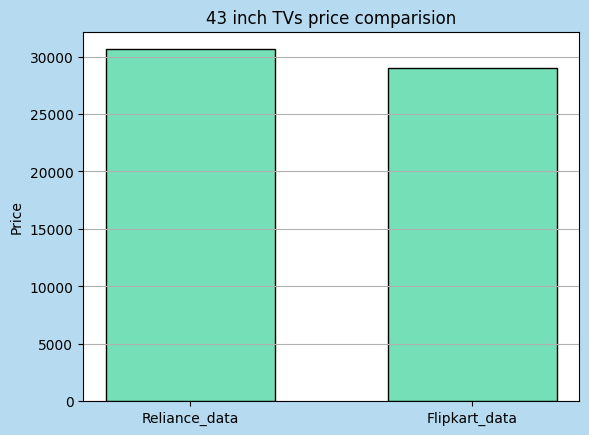

In [124]:
# Plot a bar chart on avg_price_per_display_size for a given display_size
inp_=int(input('Enter display size: '))
if inp_ in common_ds:
    x_labels=['Reliance_data','Flipkart_data']
    y_labels=[R_avg_price_per_display_size[str(inp_)+" inch"],avg_price_per_display_size[str(inp_)+" inch"]]
    fig,axes=plt.subplots(facecolor='#b6dbf0',dpi=100)
    axes.bar(x_labels,y_labels,width=0.6,edgecolor='k',color='#75e0b7')
    plt.grid(axis='y')
    plt.ylabel('Price')
    plt.title(str(inp_)+" inch TVs price comparision")
else:
    print('Enter valid display size')

In [125]:
avg_price_per_company_R.index=avg_price_per_company_R.index.str.upper()
avg_price_per_company.index=avg_price_per_company.index.str.upper()
avg_price_per_company

Company Name
ADSUN         7632.4
AKAI         22900.0
BPL          21657.0
BEETHOSOL     7599.0
BLAUPUNKT    38624.0
              ...   
IFFALCON     31356.1
IMEE         20399.0
NDGO         31784.7
REALME       23832.3
STARSHINE    12499.0
Name: Price, Length: 66, dtype: float64

Enter company: LG


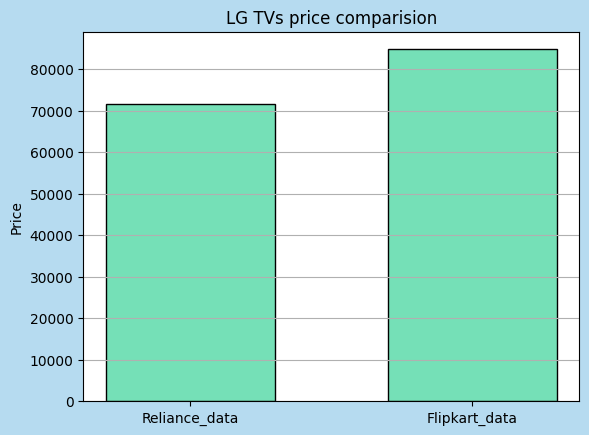

In [126]:
# Plot a bar chart on avg_price_per_display_size for a given company
inp_=input('Enter company: ')
if inp_ in common_cmp:
    x_labels=['Reliance_data','Flipkart_data']
    y_labels=[avg_price_per_company_R[inp_],avg_price_per_company[inp_]]
    fig,axes=plt.subplots(facecolor='#b6dbf0',dpi=100)
    axes.bar(x_labels,y_labels,width=0.6,edgecolor='k',color='#75e0b7')
    plt.grid(axis='y')
    plt.ylabel('Price')
    plt.title(inp_+' TVs price comparision')
else:
    print('Enter valid company name')

#### Plot the charts comparing the avg_price_per_display_size in both datasets

In [127]:
# Data to plot
Flipkart_data=[avg_price_per_display_size[str(i)+' inch']*1.0 for i in common_ds]
Reliance_data=[R_avg_price_per_display_size[str(i)+' inch'] for i in common_ds]

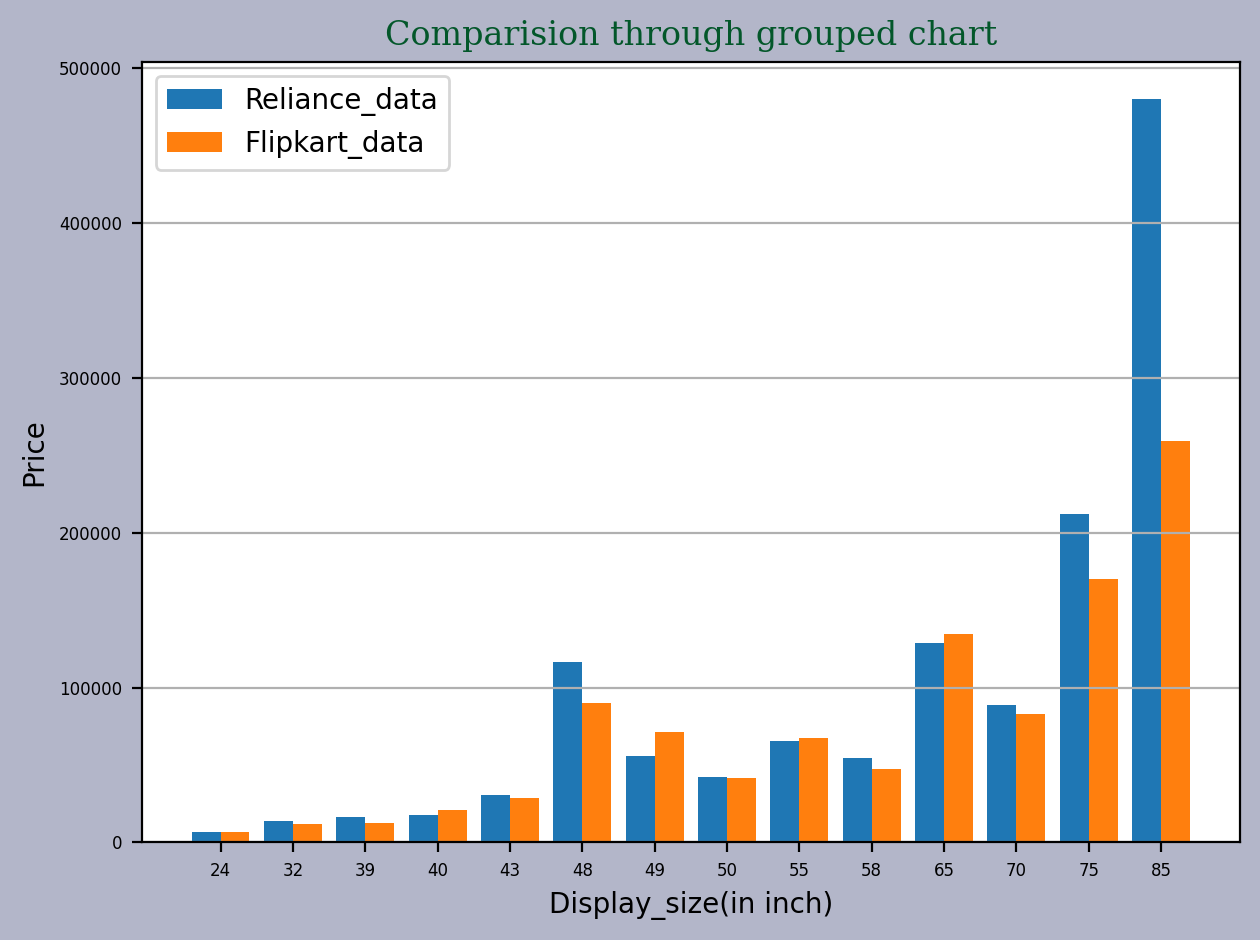

In [128]:
# Plot a grouped bar chart comparing the avg_price_per_display_size in both datasets
fig,axes=plt.subplots(facecolor='#b3b6c9',dpi=200)
plt.bar(np.arange(len(common_ds)),Reliance_data,label='Reliance_data',width=0.4)
plt.bar(np.arange(len(common_ds))+0.4,Flipkart_data,label='Flipkart_data',width=0.4)
plt.xticks(np.arange(len(common_ds))+0.2,common_ds)
plt.tick_params(axis='both', which='major', labelsize=6)
plt.xlabel('Display_size(in inch)')
plt.grid(axis='y')
plt.ylabel('Price')
plt.legend()
plt.title('Comparision through grouped chart',color='#03572a',family='serif')
plt.tight_layout();

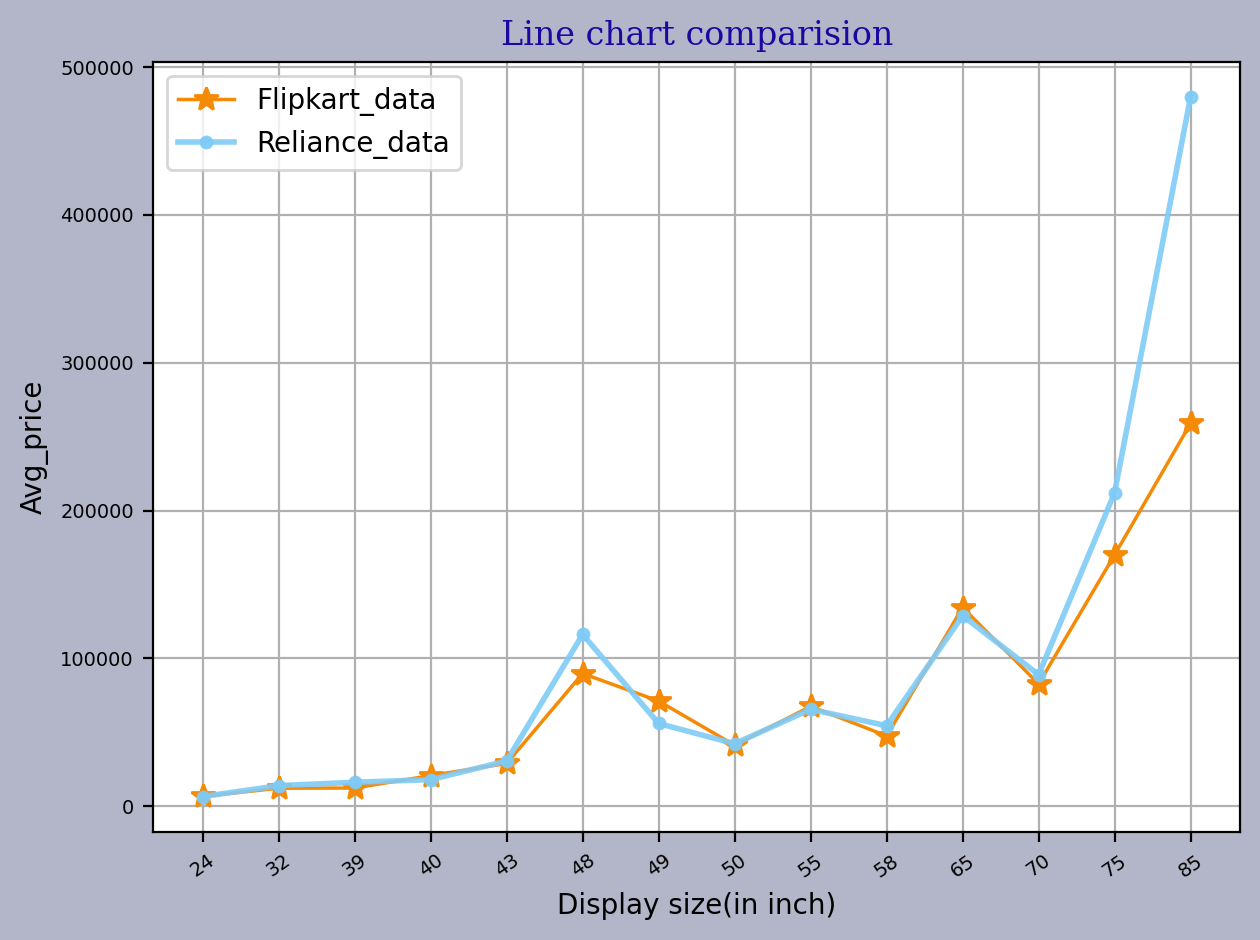

In [129]:
# Plot a line chart comparing the avg_price_per_display_size in both datasets
fig,axes=plt.subplots(facecolor='#b3b6c9',dpi=200)
axes.plot(Flipkart_data,color='#f58a07',marker='*',markersize=9,label='Flipkart_data',lw=1.25,zorder=2)
axes.plot(Reliance_data,color='#7ecbf7',marker='o',markersize=4,label='Reliance_data',lw=2,alpha=0.9);
axes.set_xlabel('Display size(in inch)')
axes.set_ylabel('Avg_price')
plt.tick_params(axis='both', which='major', labelsize=7);
axes.legend()
axes.grid()
plt.title('Line chart comparision',{'color':'#1e06a1','family': 'serif'})
plt.xticks(ticks=np.arange(len(common_ds)),labels=common_ds,rotation=35)
plt.tight_layout();

#### Plot bar chart for avg_price / avg_ratings vs all companies in a single figure.

In [130]:
# Gathering input company details
input_comp=input('Enter company name: ')
reliance_df['Company']=reliance_df['Company'].str.upper()
flipkart_df['Company Name']=flipkart_df['Company Name'].str.upper()
flipkart1=flipkart_df[flipkart_df['Company Name']==input_comp][['Price','Ratings per 5★','Display size']]
reliance1=reliance_df[reliance_df['Company']==input_comp][['Price','Ratings per 5★','Display size']]

Enter company name: LG


In [131]:
# Finding avg_price_per_display_size
F_xvalues=round(flipkart1.groupby('Display size')['Price'].agg('mean'),1).index.tolist()
F_yvalues=round(flipkart1.groupby('Display size')['Price'].agg('mean'),1).values.tolist()
R_xvalues=round(reliance1.groupby('Display size')['Price'].agg('mean'),1).index.tolist()
R_yvalues=round(reliance1.groupby('Display size')['Price'].agg('mean'),1).values.tolist()

In [132]:
# Finding avg_rating_per_display_size
F_xvalues1=round(flipkart1.groupby('Display size')['Ratings per 5★'].agg('mean'),1).index.tolist()
F_yvalues1=round(flipkart1.groupby('Display size')['Ratings per 5★'].agg('mean'),1).values.tolist()

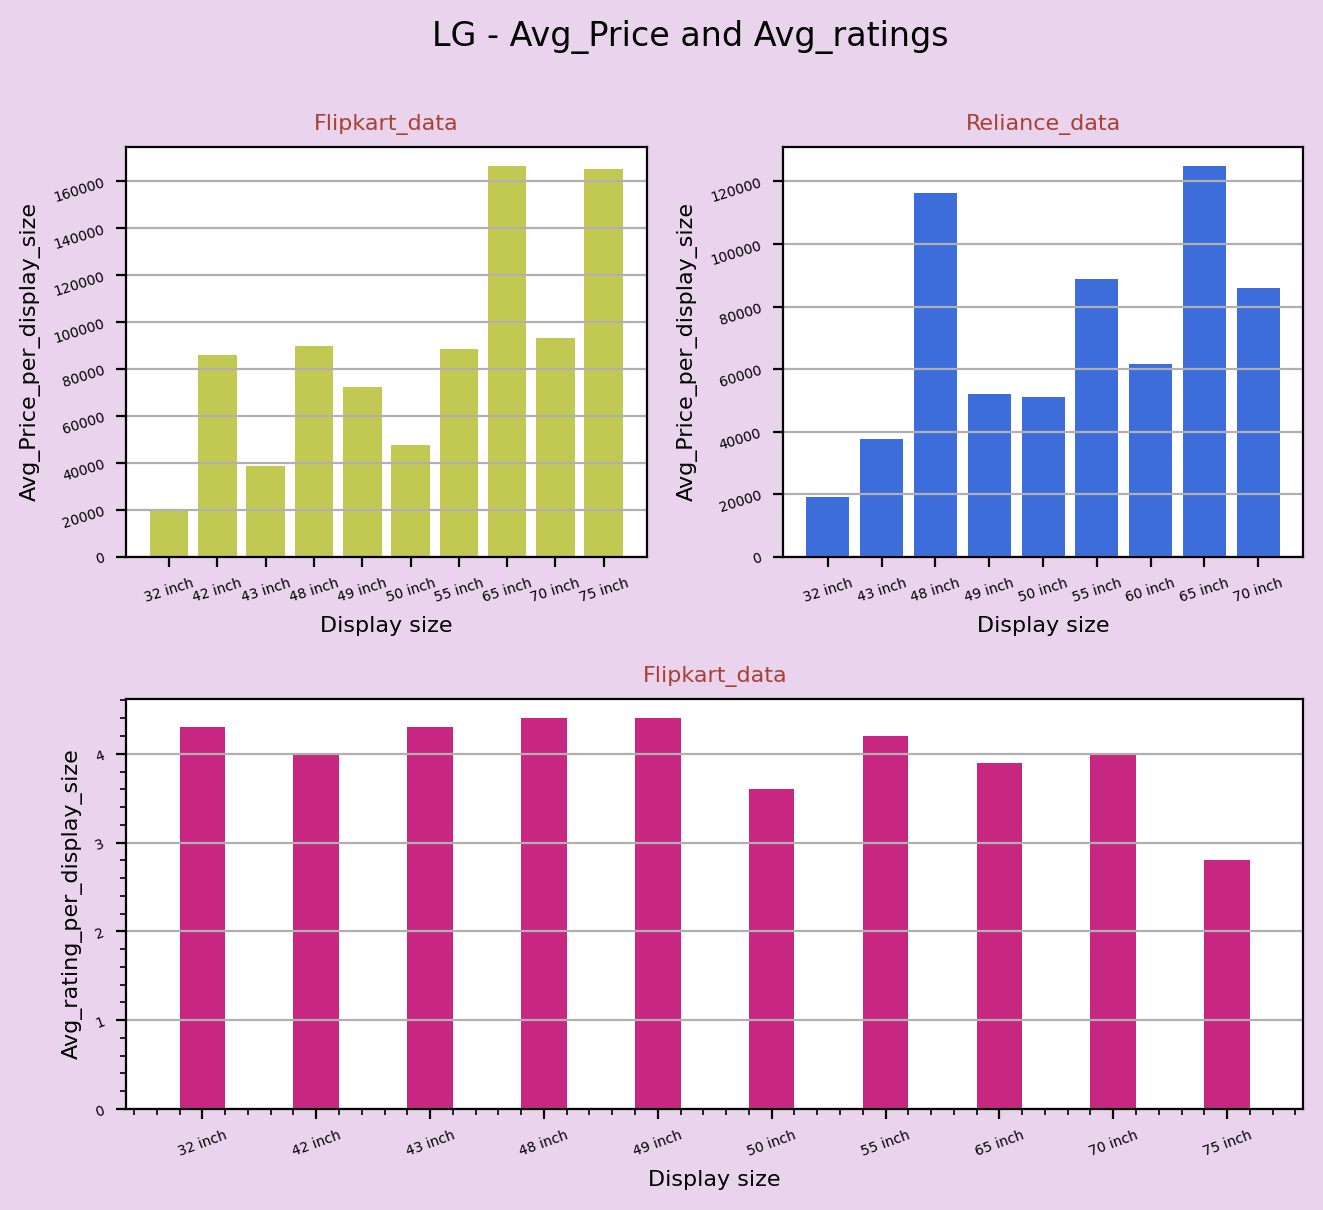

In [133]:
fig = plt.figure(facecolor='#e9d3ed',figsize=(10,6),dpi=200)
# remove any existing axes 
fig.clf()
# First plot
ax1 = plt.subplot2grid((2,3), (0,0))
ax1.bar(F_xvalues,F_yvalues,color='#c2c953')
ax1.tick_params(axis='both', which='major', labelsize=5,rotation=17.5)
ax1.set_xlabel('Display size',fontsize=8)
ax1.set_ylabel('Avg_Price_per_display_size',fontsize=8)
ax1.grid(axis='y')
ax1.set_title('Flipkart_data',color='#a84034',fontsize=8)
# Second plot
ax2 = plt.subplot2grid((2,3), (0,1))
ax2.bar(R_xvalues,R_yvalues,color='#3d6ddb')
ax2.tick_params(axis='both', which='major', labelsize=5,rotation=17.5)
ax2.set_xlabel('Display size',fontsize=8)
ax2.set_ylabel('Avg_Price_per_display_size',fontsize=8)
ax2.grid(axis='y')
ax2.set_title('Reliance_data',color='#a84034',fontsize=8)
# Third subplot (1 row x 1 column)
ax3 = plt.subplot2grid((2,3), (1,0), colspan=2)
ax3.bar(F_xvalues1,F_yvalues1,color='#c72681',width=0.4)
ax3.tick_params(axis='both', which='major', labelsize=5,rotation=20)
ax3.set_xlabel('Display size',fontsize=8)
ax3.set_ylabel('Avg_rating_per_display_size',fontsize=8)
ax3.grid(axis='y')
ax3.minorticks_on()
ax3.set_title('Flipkart_data',color='#a84034',fontsize=8)

plt.suptitle(input_comp+' - Avg_Price and Avg_ratings',x=0.35,y=1)
plt.tight_layout();


#### Plot a grouped bar chart on avg_price_per_company showing company common in Reliance and Flipkart datasets

In [134]:
# Data to plot
avg_price_per_company.index=avg_price_per_company.index.str.upper()
avg_price_per_company_R.index=avg_price_per_company_R.index.str.upper()
Flipkart_data1=[avg_price_per_company[i] for i in (common_cmp)]
Reliance_data1=[avg_price_per_company_R[i] for i in (common_cmp)]

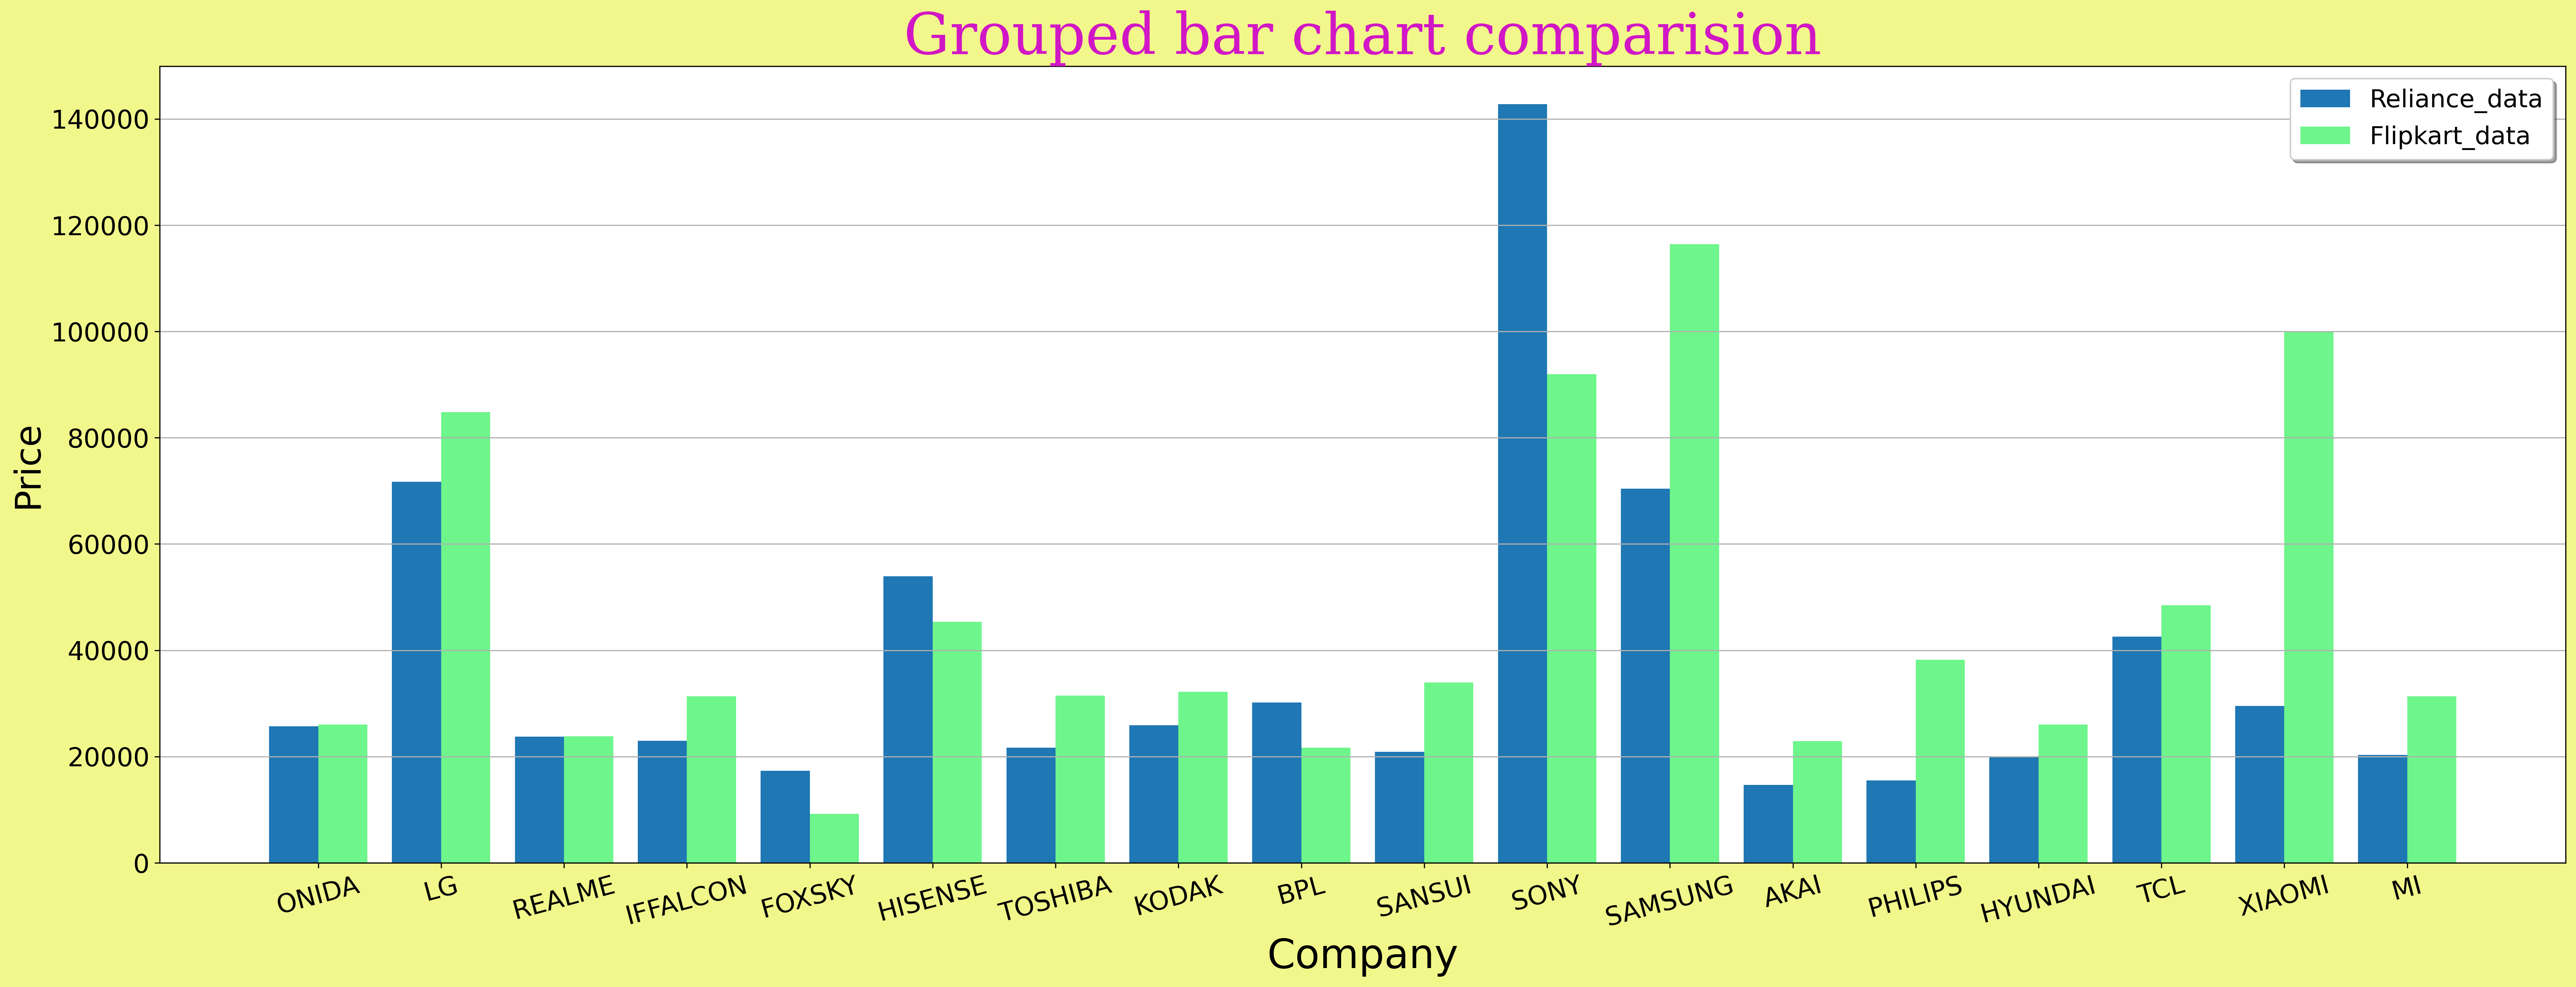

In [135]:
fig,axes=plt.subplots(facecolor='#f2f78b',figsize=(30,10),dpi=300)
plt.bar(np.arange(len(common_cmp)),Reliance_data1,label='Reliance_data',width=0.4)
plt.bar(np.arange(len(common_cmp))+0.4,Flipkart_data1,label='Flipkart_data',width=0.4,color='#6ef58b')
plt.xticks(np.arange(len(common_cmp))+0.2,common_cmp,rotation=15)
plt.xlabel('Company',size=28)
plt.grid(axis='y')
plt.ylabel('Price',size=25)
plt.legend(fontsize='xx-large',shadow=True)
plt.title('Grouped bar chart comparision',color='#d117c5',size=40,fontdict={'family': 'serif'})
plt.tick_params(axis='both', which='major', labelsize=18);

#### Plot a pie chart showing the share of most popular company products in 2 different plots (1- Reliance,2-Flipkart) of a single figure.

In [136]:
# Finding labels and count_of_products_per_company
labels=['REALME','MI','ONIDA','SONY','SAMSUNG','LG','HISENSE','BPL','PHILIPS']
F_count_of_products_per_company=flipkart_df.groupby('Company Name')['Product Name'].count()
R_count_of_products_per_company=reliance_df.groupby('Company')['Product Name'].count()
F_values=[F_count_of_products_per_company.loc[i] for i in labels]
R_values=[R_count_of_products_per_company.loc[i] for i in labels]

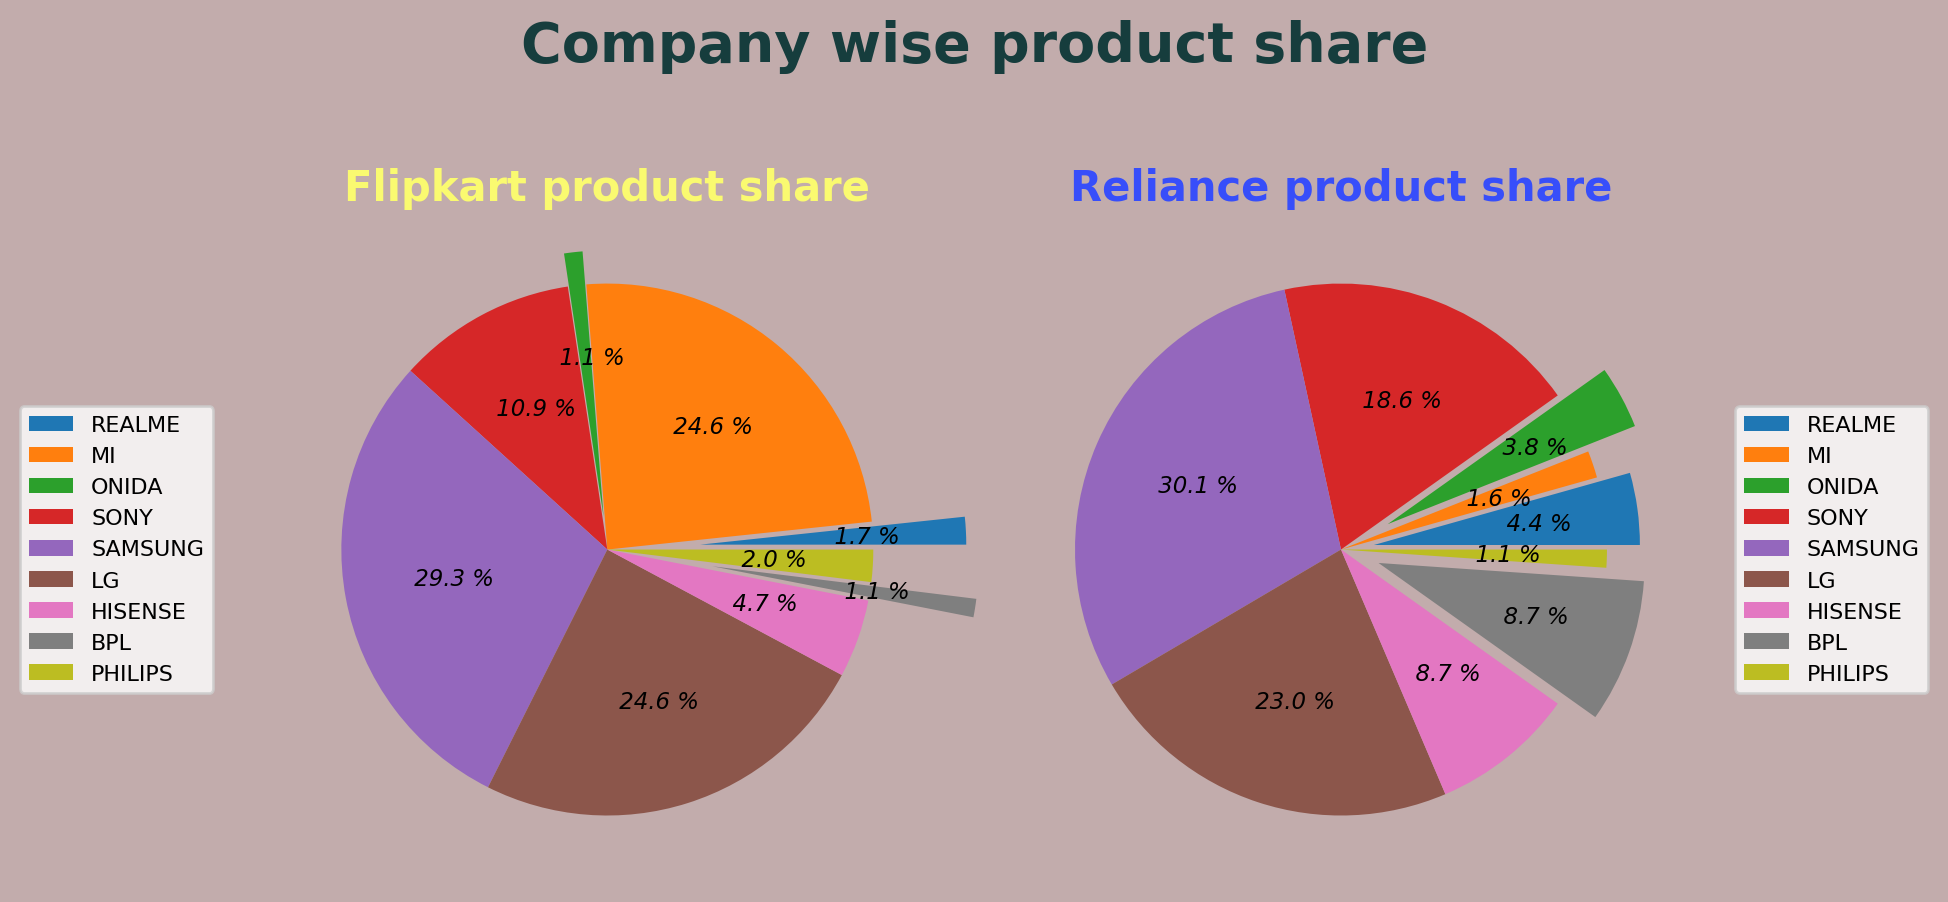

In [147]:
fig,axes=plt.subplots(1,2,facecolor='#c2acac',figsize=(10,5),dpi=200)
plt.suptitle('Company wise product share',color='#163d3d',weight='bold',size=20)
axes[0].pie(F_values,autopct='%5.1f %%',explode=(0.35,0,0.125,0,0,0,0,0.40,0),labeldistance=1.075,wedgeprops={'linewidth':2},textprops={'size':8.225,'wrap':True,'style':'italic','weight':'ultralight'})
axes[0].legend(labels, loc='center left', bbox_to_anchor=(-0.40, .5), fontsize=8)
axes[0].set_title('Flipkart product share',color='#fafa70',weight='bold',size=15)
axes[1].pie(R_values,autopct='%5.1f %%',labeldistance=1.075,explode=(0.125,0,0.20,0,0,0,0,0.15,0),wedgeprops={'linewidth':2},textprops={'size':8.225,'wrap':True,'style':'italic','weight':'ultralight'})
axes[1].legend(labels, loc='center right', bbox_to_anchor=(1.4, .5), fontsize=8)
axes[1].set_title('Reliance product share',color='#374efa',weight='bold',size=15)
plt.tight_layout();


#### Plot the distribution of no.of TVs for a given company vs their Ratings

In [148]:
ratings_bins=[1,2,2.5,3,3.5,4,4.2,4.4,4.6,4.8,5]
Frequency_of_TVs=flipkart_df['Ratings per 5★']
Frequency_of_TVs_R=reliance_df['Ratings per 5★']

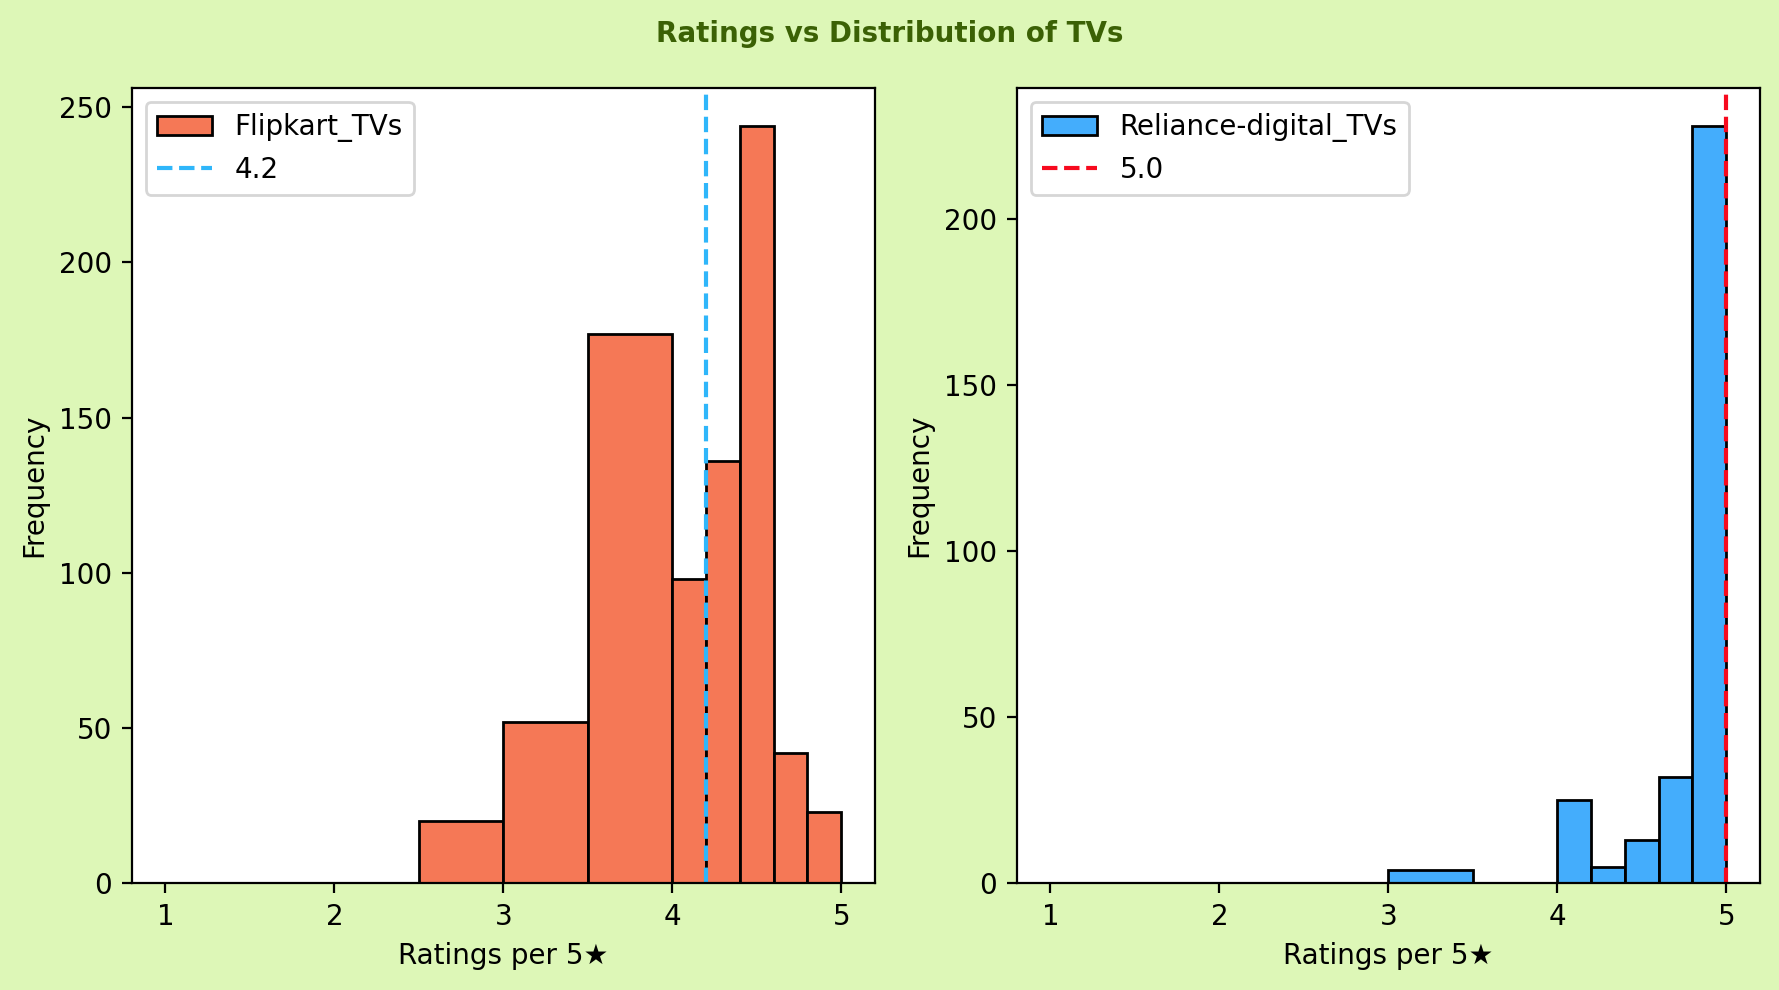

In [149]:
fig,axes=plt.subplots(1,2,facecolor='#ddf7b7',figsize=(9,5),dpi=200)
plt.suptitle('Ratings vs Distribution of TVs',color='#3b6105',weight='bold',size=10)
# 1st histogram
axes[0].hist(Frequency_of_TVs,bins=ratings_bins,edgecolor='k',color='#f57856',label='Flipkart_TVs')
axes[0].axvline(Frequency_of_TVs.median(), color='#2fb6fa', linestyle='dashed', linewidth=1.5,label=Frequency_of_TVs.median())
axes[0].set_xlabel('Ratings per 5★')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# 2nd histogram
axes[1].hist(Frequency_of_TVs_R,bins=ratings_bins,edgecolor='k',color='#44adfc',label='Reliance-digital_TVs')
axes[1].axvline(Frequency_of_TVs_R.median(), color='#f70a1e', linestyle='dashed', linewidth=1.5,label=Frequency_of_TVs_R.median())
axes[1].set_xlabel('Ratings per 5★')
axes[1].set_ylabel('Frequency')
axes[1].legend()
plt.tight_layout();

#### Plot a heatmap showing customer score for each company products in flipkart

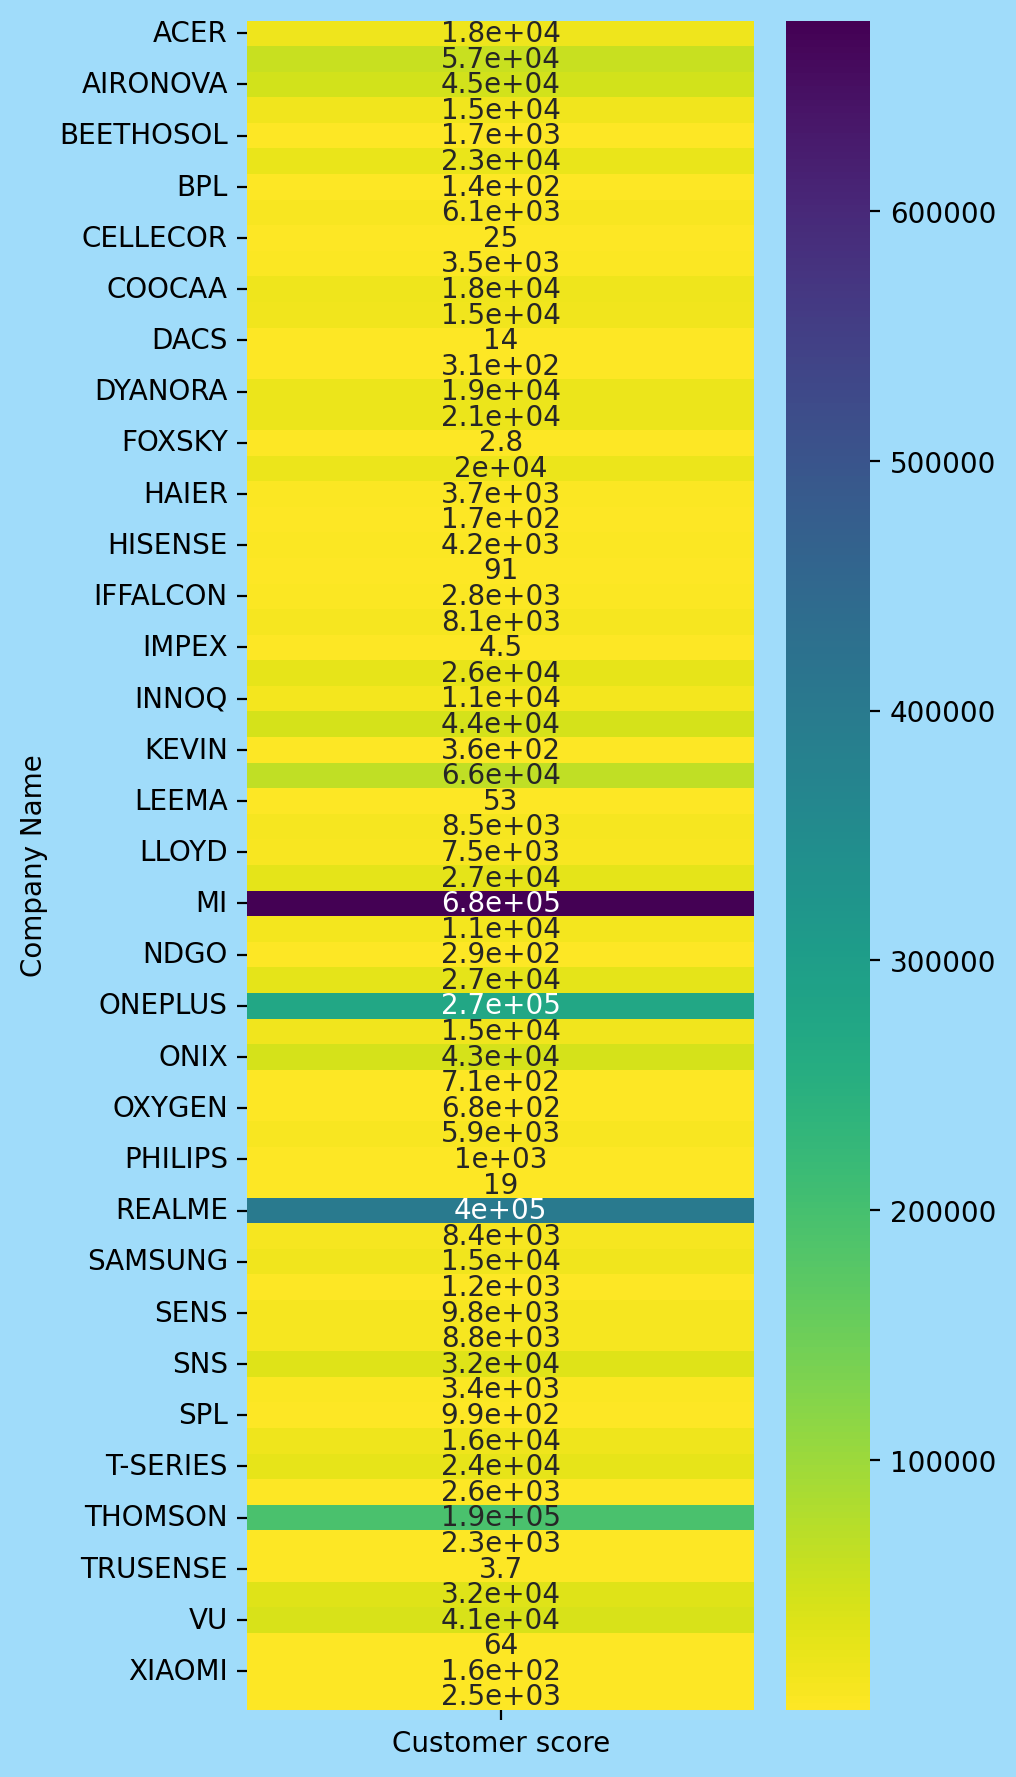

In [193]:
import seaborn as sns
avg_customer_score=round(flipkart_df.groupby('Company Name')['Customer score'].agg('mean'),1)
avg_customer_score=avg_customer_score.to_frame()
# avg_customer_score

plt.figure(figsize=(5,9),dpi=200,facecolor='#a0dcfa')
#Some styles - "rocket","viridis","magma","YlOrBr"
sns.heatmap(avg_customer_score, annot=True, cmap='viridis_r')
plt.tight_layout();